In [ ]:
# Inputs for module
# Which optimization method to use (GD default)
# Learning rate (0.015 default)
# Adam hyperprameters (0.9 default for both)
# Reduced mechanism txt file
# full_eqn.txt
# full_spc.txt
# Rates at which coefficients shouldn't be optimized (1 default)
# Which coefficients contribute to the score
# Ranges for coefficients (Lower limit 0 default)
# Input conditions

In [ ]:
f0am_file

<function __main__.f0am_file(prod_list_n_r, mech_name, copy_prod, optimized_coeffs, individual_coeffs, map, method, topo_graph)>

#Isop Stuff

Isoprene Specific Intro

In [8]:
input_conditions = [{},{},{},{},{},{}]

#base
input_conditions[0]['OH'] = 0.0002
input_conditions[0]['HO2'] = 7.00E-03
input_conditions[0]['NO'] = 0.08
input_conditions[0]['O3'] = 20
input_conditions[0]['NO3'] = 0.007
input_conditions[0]['CH3OO'] = 0.001
input_conditions[0]['CH3CO3'] = 0.001
input_conditions[0]['O2'] = 210000000
input_conditions[0]['sza'] = 0
input_conditions[0]['sun'] = 1

#low nox
input_conditions[1]['OH'] = 0.0002
input_conditions[1]['HO2'] = 7.00E-03
input_conditions[1]['NO'] = 0.02
input_conditions[1]['O3'] = 0
input_conditions[1]['NO3'] = 0.000
input_conditions[1]['CH3OO'] = 0.000
input_conditions[1]['CH3CO3'] = 0.000
input_conditions[1]['O2'] = 210000000
input_conditions[1]['sza'] = 0
input_conditions[1]['sun'] = 1

#high nox
input_conditions[2]['OH'] = 0.0002
input_conditions[2]['HO2'] = 7.00E-03
input_conditions[2]['NO'] = 0.2
input_conditions[2]['O3'] = 0
input_conditions[2]['NO3'] = 0.000
input_conditions[2]['CH3OO'] = 0.000
input_conditions[2]['CH3CO3'] = 0.000
input_conditions[2]['O2'] = 210000000
input_conditions[2]['sza'] = 0
input_conditions[2]['sun'] = 1

#high o3
input_conditions[3]['OH'] = 0.0001
input_conditions[3]['HO2'] = 7.00E-03
input_conditions[3]['NO'] = 0.03
input_conditions[3]['O3'] = 80
input_conditions[3]['NO3'] = 0.000
input_conditions[3]['CH3OO'] = 0.001
input_conditions[3]['CH3CO3'] = 0.001
input_conditions[3]['O2'] = 210000000
input_conditions[3]['sza'] = 0
input_conditions[3]['sun'] = 1

#high no3 low hv
input_conditions[4]['OH'] = 0.00005
input_conditions[4]['HO2'] = 3.00E-03
input_conditions[4]['NO'] = 0.08
input_conditions[4]['O3'] = 0
input_conditions[4]['NO3'] = 0.007
input_conditions[4]['CH3OO'] = 0.001
input_conditions[4]['CH3CO3'] = 0.001
input_conditions[4]['O2'] = 210000000
input_conditions[4]['sza'] = 90
input_conditions[4]['sun'] = 0

# low hv
input_conditions[5]['OH'] = 0.00005
input_conditions[5]['HO2'] = 3.00E-03
input_conditions[5]['NO'] = 0.08
input_conditions[5]['O3'] = 20
input_conditions[5]['NO3'] = 0.000
input_conditions[5]['CH3OO'] = 0.001
input_conditions[5]['CH3CO3'] = 0.001
input_conditions[5]['O2'] = 210000000
input_conditions[5]['sza'] = 90
input_conditions[5]['sun'] = 0

In [9]:
# reference mechanism inputs
eq_list = read_eqns(full_eqn)
species_list_names = read_spc(full_spc)
# eq_list = read_eqns('./caltech_amore_isoprene_full_eqn.txt')
# species_list_names = read_spc('./caltech_amore_isoprene_full_spc.txt')
species_list_names.append('MGLYOX')
species_list_names = list(set(species_list_names))
species_list = list(range(len(species_list_names)))
spec_len = len(species_list)
rate_list = [i[1] for i in eq_list]
rate_list_clean = [i[1] for i in eq_list]

#background_rxns
background_conc = [0.0002,
0.015,
0.5,
0.001,
0.007,
20,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
  210000000,
4.0727831285287275e-29,
1e-5,
1e-5,
1e-5,
1e-5,
1e-5,
4.0727831285287275e-29,
4.0727831285287275e-29,
4.0727831285287275e-29,
400,
9,
210000000,
0,
0,
0,
0,
0,
0,
0]

#background_spc
#a list of background species to be excluded from our reaction network for visual clarity (and also because they will mess with the drg reduction method)
background_spc_0 = ['OH','NO','NO2','NO3','HO2','O3','CH3OO','CO2','CO','O2','N2O5','H2O','H2O2','H2Od','SO2',
                  'H2S','HF','H2S','N2H4','HN3','HI','HBr',
                  'HCl','HCN','H2Se','H2Te','NH2OH','HBrO','HClO','H3PO2','HPO3',
                  'H2O3','OF2','O2F2','NOHSO4','COS','N2F4','N2O4','N2O3','HNO3',
                  'HNO2','N2O','NF5','NI3','H2SO4','CS2','H2CO3','H2SO3','SO2Cl2','S4N4','H2SO5',
                  'H2S2O7','S2F10','H3NO3S','Br2S','SF6','SF4', 'CH3CO3']
background_spc = []
background_spc_n = []
for i in background_spc_0:
    if i in species_list_names:
        background_spc_n.append(i)
        background_spc.append(species_list_names.index(i))

#background concentrations
background_dict = {}
for i in range(len(background_spc_n)):
    if i<len(background_conc):
        background_dict[background_spc_n[i]] = background_conc[i]
    else:
        background_dict[background_spc_n[i]] = 0



reac_list_n,reac_coeff_list,prod_list_n,prod_coeff_list = get_prod_reac(eq_list)
reac_len = len(reac_list_n)


# atmospheric inputs
atm_cond = {}
temp = 292
pressure = 1000
solar_zenith = 0
solar_factor = 1
atm_cond['temp'] = temp
atm_cond['pres'] = pressure
atm_cond['sza'] = solar_zenith
atm_cond['sun'] = solar_factor


FileNotFoundError: [Errno 2] No such file or directory: './caltech_amore_isoprene_full_eqn.txt'

In [ ]:
CFACTOR = 2.5e+19;
RO2 = 0.01*10e-9;
SUN = 0.5;
TEMP = 295;
M = pressure_to_m(1000,295);
sza = 0;

background_dict_2 = deepcopy(background_dict)

#reactions
rxn_dict = {}
rxn_dict['reac'] = reac_list_n
rxn_dict['reac_coeff'] = reac_coeff_list
rxn_dict['prod'] = prod_list_n
rxn_dict['prod_coeff'] = prod_coeff_list
rxn_dict['k'] = rate_list
rxn_dict['rates'] = rate_list_clean

#second reactants
second_reactants = ['MVK3OOH4N',
'ISOP1OH2N3CO4N',
'MVK3N4OH4OH',
'ISOP1OH2OH3N4N',
'ISOP1OOH2OOH3CO4CO',
'ISOP1N2OH3OH4N',
'ISOP1N2OH3OOH4CO',
'ISOP1N2OOH34O4OH',
'MVK3OH3OOH',
'ISOP1OH12O3OOH4N',
'ISOP1OOH2OH3N4N',
'ISOP1CO2OOH3OH4CO',
'ISOP3N4N',
'MVK3N4N',
'ISOP1OH4CO4OH',
'ISOP1OH23O4N',
'ISOP1N2N3OH4OH',
'ISOP1CO1OOH4OH',
'HMML',
'ISOP1OH4OOt',
'MACR2OH3OOH',
'ISOP1OOH2OOH3OH4N',
'MVK3OH4OOH',
'MACR3OH3OOH',
'ISOP1CO23O4OOH',
'ISOP1OOH2OH3OH4N',
'ISOP12O3CO4N',
'ISOP1OH4OOc',
'ISOP1OH2OOH3N4N',
'ISOP1CO1OH4N',
'ISOP1CO2N3OH4N',
'ISOP12O3OH4OOH',
'ISOP1OOH2OH3OOH4OH',
'ISOP1CO2N3OH4OH',
'ISOP1OH2N3OOH4CO',
'ISOP1N2OH3CO4OOH',
'ISOP1CO2OOH34O4OH',
'MACR4N',
'ISOP1N2OH3OOH4OOH',
'ISOP1OH2OH3OOH4N',
'PYRAC',
'ISOP1OOH2OH3CO4N',
'ISOP1OOH2N3OH4N',
'ISOP1OH2N3OOH4N',
'ISOP1N2OH3N4OOH',
'ISOP1OOH2OOH3N4CO',
'HPETHNL',
'ISOP1OH4CO4OOH',
'ISOP1OH2OOH3OH4OO',
'ISOP1OH2OH3N4CO',
'ISOP1N2OH3OH4OOH',
'ISOP1OH2OOH3CO4CO',
'ETHLN',
'ISOP1OH2OO',
'ISOP1OH2OOH3OH4CO',
'ISOP1N2N3OH4OOH',
'ISOP1OO4OHc',
'ISOP1OO4N',
'ISOP1N4CO4OH',
'ISOP1CO2OOH3N4OOH',
'ISOP1N2OH3OOH4N',
'ISOP1N2OH3OOH4OH',
'ISOP1N2OOH3OOH4OH',
'ISOP1OH12O3OH4OOH',
'ISOP1N2N3CO4OH',
'ISOP1CO2OH34O',
'ISOP1OH4OH',
'ISOP1CO2OH3OOH4OH',
'ISOP1OH2N3OH4N',
'ISOP1N4CO4OOH',
'ISOP1OOH23O4CO',
'PROPNN',
'ISOP1N4N',
'ISOP1CO2OOH3OOH4OOH',
'ISOP1OH2N3OH4OOH',
'ISOP1N2OOH3OH4N',
'ISOP1OOH2OOH3OOH4CO',
'ISOP1OH23O4CO',
'ISOP1CO1OOH4N',
'MACR2N3N',
'ISOP1CO2OOH3N4OH',
'ISOP1N2OH3N4OH',
'ISOP1OH2OOH3N4CO',
'ISOP1N2OO',
'ISOP1N2OOH3N4OH',
'MACR1OH',
'ISOP1OOH2OH34O',
'ISOP1OOH2OH34O4OH',
'ISOP1N4O',
'ISOP1N2OOH3OOH4CO',
'ISOP1CO1OH4OH',
'ISOP1OOH2OH3CO4CO',
'ISOP1OH2OO3CO4OH',
'ISOP1CO2N3OH4OOH',
'ISOP1CO2OOH3OOH4N',
'ISOP1N2N',
'ISOP1OH2OOH3OOH4OH',
'ISOP1OH2OOH3CO4N',
'ISOP1OH2N3CO4OH',
'ISOP1OH12O3OOH4CO',
'MACR2OOH3N',
'ISOP1OOH2OH3CO4OH',
'ISOP1OOH2N3OOH4CO',
'MACR2OH3N',
'ISOP1CO2OOH3OH4N',
'ISOP1OOH2OH3N4OH',
'ISOP1CO2OH3OOH4CO',
'MVK3OOH4CO4OOH',
'HOCH2COCHO',
'ISOP12O3OH4N',
'MVK3OOH4OH4OH',
'ISOP1OOH23O3OH4N',
'ISOP1OH2OOH3OH4OOH',
'ISOP1OO4OHt',
'ISOP1N4OO',
'ISOP1N2OH3OO4OH',
'ISOP3OH4OH',
'ISOP1N2OO3OH4OH',
'ISOP1N2OOH3OH4CO',
'ISOP1CO2OH3OOH4N',
'ISOP1CO23O4OH',
'ISOP1OH2N3OOH4OH',
'ISOP1N2OOH3OH4OH',
'ISOP1OH2OOH3OOH4CO',
'MACR2N3OH',
'ISOP1N2OOH3OH4OOH',
'ISOP1CO2OOH3OOH4OH',
'ISOP1CO3OH4OH',
'ISOP1OH2OOH3OOH4N',
'ISOP1CO4CO',
'ISOP1N2OH3N4CO',
'ISOP1N2OH34O',
'ISOP1OH12O3OOH4OH',
'ISOP12O3CO4OH',
'ISOP1OOH2OH3OOH4N',
'ISOP1OH3OH4CO',
'HPAC',
'ISO1OH12O',
'ISOP3OO4N',
'ISOP1OH2OO3OH4OOH',
'ISOP1OH2OH3OOH4CO',
'ISOP1N2N3OOH4OH',
'ISOP3OO4OH',
'MACR2OOH3OH',
'ISOP1OOH2OH3N4CO',
'ISOP1OH2OOH34O4OH',
'ISOP1CO23O4N',
'ISOP1CO2N3OOH4OH',
'ISOP1OH2OH',
'ISOP1CO2N3OOH4OOH',
'ISOP1N23O4CO',
'ISOP1CO2OOH3OH4OH',
'ISOP1CO2OOH3OOH4CO',
'MACR2OOH3CO3OOH',
'ISOP1OH2OOH3N4OH',
'ISOP1OH2N3N4OH',
'ISOP12O3OH4CO',
'ISOP1OH2OOH3CO4OH',
'ISOP1N2OH3CO4N',
'HCOOH',
'ISOP1OH2OOH3OH4N']

scnd_dict = {}
for i in second_reactants:
    scnd_dict[i] = 0
print('hi there')

# algorithm settings
settings = {}
settings['root'] = 'ISOP'
settings['yield cutoff'] = 0.1
settings['rate cutoff'] = 0
settings['protected'] = ['ISOP','ISOP1OH23O4OHt','ISOP1OH23O4OHc', 'ISOP1OH2OH34O', 'MVK','HCHO', 'HAC','PAN','GLYC','PYRAC','MGLY','HCOOH','MACR','MPAN','GLYX']
#settings['']
settings['# of species desired'] = 200

background_dict_2['OH'] = 0.0002
background_dict_2['HO2'] = 7.00E-03
background_dict_2['NO'] = 0.08
background_dict_2['O3'] = 20
background_dict_2['NO3'] = 0.007
background_dict_2['CH3OO'] = 0.001
background_dict_2['CH3CO3'] = 0.001
background_dict_2['O2'] = 210000000
atm_cond['sza'] = 0
atm_cond['sun'] = 1

"""Set original dictionary in same format as test dictionary"""

inputs_ref = {'spc':species_list_names, 'rxn':rxn_dict, 'bck':background_dict_2, 'scnd':scnd_dict, 'atm cond':atm_cond,'settings':settings}


# inputs required: compare_species_r, compare_species, reference_data, input_conditions
# inputs_test = {'spc':species_list_names_r, 'rxn':rxn_dict, 'bck':background_dict_2, 'scnd':scnd_dict, 'atm cond':atm_cond,'settings':settings}

# inputs: conditions, background dict, test, compare_species, compare_species_r, species_list_names_r, reference_data, spec_factor,

"""PROD 1: Set new reaction dictionary with reduced mechanism and test coefficients"""

# reduced_mechanism inputs


reduced_mech_file = open('./f0am_AMORE_with_grad_upd_39.txt', "r")
#reduced_mech_file = open(mech_file, "r")
red_mech = reduced_mech_file.read()

species_list_names_r, reac_list_n_r,reac_coeff_list_r,prod_list_n_r,prod_coeff_list_r,rate_list_r, rates_eval_r, rates_2 = f0am_to_python(red_mech)


species_list_names_r = list(set(species_list_names_r))
species_list_r = list(range(len(species_list_names_r)))
spec_len_r = len(species_list_r)


#background_rxns
background_conc = [0.0002,

0.015,
0.5,
0.001,
0.007,
20,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
0.0001,
  210000000,
4.0727831285287275e-29,
1e-5,
1e-5,
1e-5,
1e-5,
1e-5,
4.0727831285287275e-29,
4.0727831285287275e-29,
4.0727831285287275e-29,
400,
9,
210000000,
0,
0,
0,
0,
0,
0,
0]

#background_spc
#a list of background species to be excluded from our reaction network for visual clarity (and also because they will mess with the drg reduction method)
background_spc_0 = ['OH','NO','NO2','NO3','HO2','O3','CH3OO','CO2','CO','O2','N2O5','H2O','H2O2','H2Od','SO2',
                  'H2S','HF','H2S','N2H4','HN3','HI','HBr',
                  'HCl','HCN','H2Se','H2Te','NH2OH','HBrO','HClO','H3PO2','HPO3',
                  'H2O3','OF2','O2F2','NOHSO4','COS','N2F4','N2O4','N2O3','HNO3',
                  'HNO2','N2O','NF5','NI3','H2SO4','CS2','H2CO3','H2SO3','SO2Cl2','S4N4','H2SO5',
                  'H2S2O7','S2F10','H3NO3S','Br2S','SF6','SF4', 'CH3CO3']
background_spc = []
background_spc_n = []
for i in background_spc_0:
    if i in species_list_names_r:
        background_spc_n.append(i)
        background_spc.append(species_list_names_r.index(i))



#background concentrations
background_dict = {}
for i in range(len(background_spc_n)):
    if i<len(background_conc):
        background_dict[background_spc_n[i]] = background_conc[i]
    else:
        background_dict[background_spc_n[i]] = 0




reac_len = len(reac_list_n_r)


# atmospheric inputs
atm_cond = {}
temp = 292
pressure = 1000
solar_zenith = 0
solar_factor = 1
atm_cond['temp'] = temp
atm_cond['pres'] = pressure
atm_cond['sza'] = solar_zenith
atm_cond['sun'] = solar_factor

In [10]:
CFACTOR = 2.5e+19;
RO2 = 0.01*10e-9;
SUN = 0.5;
TEMP = 295;
M = pressure_to_m(1000,295);
sza = 0;

background_dict_2 = deepcopy(background_dict)

#reactions
rxn_dict = {}
rxn_dict['reac'] = reac_list_n_r
rxn_dict['reac_coeff'] = reac_coeff_list_r
rxn_dict['prod'] = prod_list_n_r
rxn_dict['prod_coeff'] = prod_coeff_list_r #set new coefficients in reaction dictionary
rxn_dict['k'] = rate_list_r
rxn_dict['rates'] = rate_list_r

#second reactants
second_reactants = ['MVK3OOH4N',
'ISOP1OH2N3CO4N',
'MVK3N4OH4OH',
'ISOP1OH2OH3N4N',
'ISOP1OOH2OOH3CO4CO',
'ISOP1N2OH3OH4N',
'ISOP1N2OH3OOH4CO',
'ISOP1N2OOH34O4OH',
'MVK3OH3OOH',
'ISOP1OH12O3OOH4N',
'ISOP1OOH2OH3N4N',
'ISOP1CO2OOH3OH4CO',
'ISOP3N4N',
'MVK3N4N',
'ISOP1OH4CO4OH',
'ISOP1OH23O4N',
'ISOP1N2N3OH4OH',
'ISOP1CO1OOH4OH',
'HMML',
'ISOP1OH4OOt',
'MACR2OH3OOH',
'ISOP1OOH2OOH3OH4N',
'MVK3OH4OOH',
'MACR3OH3OOH',
'ISOP1CO23O4OOH',
'ISOP1OOH2OH3OH4N',
'ISOP12O3CO4N',
'ISOP1OH4OOc',
'ISOP1OH2OOH3N4N',
'ISOP1CO1OH4N',
'ISOP1CO2N3OH4N',
'ISOP12O3OH4OOH',
'ISOP1OOH2OH3OOH4OH',
'ISOP1CO2N3OH4OH',
'ISOP1OH2N3OOH4CO',
'ISOP1N2OH3CO4OOH',
'ISOP1CO2OOH34O4OH',
'MACR4N',
'ISOP1N2OH3OOH4OOH',
'ISOP1OH2OH3OOH4N',
'PYRAC',
'ISOP1OOH2OH3CO4N',
'ISOP1OOH2N3OH4N',
'ISOP1OH2N3OOH4N',
'ISOP1N2OH3N4OOH',
'ISOP1OOH2OOH3N4CO',
'HPETHNL',
'ISOP1OH4CO4OOH',
'ISOP1OH2OOH3OH4OO',
'ISOP1OH2OH3N4CO',
'ISOP1N2OH3OH4OOH',
'ISOP1OH2OOH3CO4CO',
'ETHLN',
'ISOP1OH2OO',
'ISOP1OH2OOH3OH4CO',
'ISOP1N2N3OH4OOH',
'ISOP1OO4OHc',
'ISOP1OO4N',
'ISOP1N4CO4OH',
'ISOP1CO2OOH3N4OOH',
'ISOP1N2OH3OOH4N',
'ISOP1N2OH3OOH4OH',
'ISOP1N2OOH3OOH4OH',
'ISOP1OH12O3OH4OOH',
'ISOP1N2N3CO4OH',
'ISOP1CO2OH34O',
'ISOP1OH4OH',
'ISOP1CO2OH3OOH4OH',
'ISOP1OH2N3OH4N',
'ISOP1N4CO4OOH',
'ISOP1OOH23O4CO',
'PROPNN',
'ISOP1N4N',
'ISOP1CO2OOH3OOH4OOH',
'ISOP1OH2N3OH4OOH',
'ISOP1N2OOH3OH4N',
'ISOP1OOH2OOH3OOH4CO',
'ISOP1OH23O4CO',
'ISOP1CO1OOH4N',
'MACR2N3N',
'ISOP1CO2OOH3N4OH',
'ISOP1N2OH3N4OH',
'ISOP1OH2OOH3N4CO',
'ISOP1N2OO',
'ISOP1N2OOH3N4OH',
'MACR1OH',
'ISOP1OOH2OH34O',
'ISOP1OOH2OH34O4OH',
'ISOP1N4O',
'ISOP1N2OOH3OOH4CO',
'ISOP1CO1OH4OH',
'ISOP1OOH2OH3CO4CO',
'ISOP1OH2OO3CO4OH',
'ISOP1CO2N3OH4OOH',
'ISOP1CO2OOH3OOH4N',
'ISOP1N2N',
'ISOP1OH2OOH3OOH4OH',
'ISOP1OH2OOH3CO4N',
'ISOP1OH2N3CO4OH',
'ISOP1OH12O3OOH4CO',
'MACR2OOH3N',
'ISOP1OOH2OH3CO4OH',
'ISOP1OOH2N3OOH4CO',
'MACR2OH3N',
'ISOP1CO2OOH3OH4N',
'ISOP1OOH2OH3N4OH',
'ISOP1CO2OH3OOH4CO',
'MVK3OOH4CO4OOH',
'HOCH2COCHO',
'ISOP12O3OH4N',
'MVK3OOH4OH4OH',
'ISOP1OOH23O3OH4N',
'ISOP1OH2OOH3OH4OOH',
'ISOP1OO4OHt',
'ISOP1N4OO',
'ISOP1N2OH3OO4OH',
'ISOP3OH4OH',
'ISOP1N2OO3OH4OH',
'ISOP1N2OOH3OH4CO',
'ISOP1CO2OH3OOH4N',
'ISOP1CO23O4OH',
'ISOP1OH2N3OOH4OH',
'ISOP1N2OOH3OH4OH',
'ISOP1OH2OOH3OOH4CO',
'MACR2N3OH',
'ISOP1N2OOH3OH4OOH',
'ISOP1CO2OOH3OOH4OH',
'ISOP1CO3OH4OH',
'ISOP1OH2OOH3OOH4N',
'ISOP1CO4CO',
'ISOP1N2OH3N4CO',
'ISOP1N2OH34O',
'ISOP1OH12O3OOH4OH',
'ISOP12O3CO4OH',
'ISOP1OOH2OH3OOH4N',
'ISOP1OH3OH4CO',
'HPAC',
'ISO1OH12O',
'ISOP3OO4N',
'ISOP1OH2OO3OH4OOH',
'ISOP1OH2OH3OOH4CO',
'ISOP1N2N3OOH4OH',
'ISOP3OO4OH',
'MACR2OOH3OH',
'ISOP1OOH2OH3N4CO',
'ISOP1OH2OOH34O4OH',
'ISOP1CO23O4N',
'ISOP1CO2N3OOH4OH',
'ISOP1OH2OH',
'ISOP1CO2N3OOH4OOH',
'ISOP1N23O4CO',
'ISOP1CO2OOH3OH4OH',
'ISOP1CO2OOH3OOH4CO',
'MACR2OOH3CO3OOH',
'ISOP1OH2OOH3N4OH',
'ISOP1OH2N3N4OH',
'ISOP12O3OH4CO',
'ISOP1OH2OOH3CO4OH',
'ISOP1N2OH3CO4N',
'HCOOH',
'ISOP1OH2OOH3OH4N']

scnd_dict = {}
for i in second_reactants:
    scnd_dict[i] = 0


# algorithm settings
settings = {}
settings['root'] = 'ISOP'
settings['yield cutoff'] = 0.1
settings['rate cutoff'] = 0
settings['protected'] = ['ISOP','ISOP1OH23O4OHt','ISOP1OH23O4OHc', 'ISOP1OH2OH34O', 'MVK','HCHO', 'HAC','PAN','GLYC','PYRAC','MGLY','HCOOH','MACR','MPAN','GLYX']
#settings['']
settings['# of species desired'] = 200

background_dict_2['OH'] = 0.0002
background_dict_2['HO2'] = 7.00E-03
background_dict_2['NO'] = 0.08
background_dict_2['O3'] = 20
background_dict_2['NO3'] = 0.007
background_dict_2['CH3OO'] = 0.001
background_dict_2['CH3CO3'] = 0.001
background_dict_2['O2'] = 210000000

"""PROD 2: rxn_dict includes the new prod coefficients, and it is put into a test dictionary"""


# inputs required: compare_species_r, compare_species, reference_data, input_conditions
# inputs_test = {'spc':species_list_names_r, 'rxn':rxn_dict, 'bck':background_dict_2, 'scnd':scnd_dict, 'atm cond':atm_cond,'settings':settings}

# inputs: conditions, background dict, test, compare_species, compare_species_r, species_list_names_r, reference_data, spec_factor,


inputs_test = {'spc':species_list_names_r, 'rxn':rxn_dict, 'bck':background_dict_2, 'scnd':scnd_dict, 'atm cond':atm_cond,'settings':settings} # dictionary with test variables

#inputs = {'test': inputs_test, 'conditions':input_conditions, 'bck':background_dict_2,'compare species':compare_species,'compare_species_r':compare_species_r,'spc':species_list_names_r,'spec factor':spec_factor, 'reference data':reference_data}



isop_nit_tetra = ['ISOPN','ISOP1OH2N3OH4OOH','ISOP1CO23O4N','ISOP1N2OH3OOH4N','ISOP1OOH2OH3CO4N','IHNPE','ISOP1N23O4OH','ISOP1N2OH3N4OH','ISOP1N253N4OH','ISOP1OH2N3N4OH','ISOP1CO2N3OH4N','ISOP1N2OOH3OOH4CO','ISOP1OOH2OH3OOH4N','ISOP1OH2N3OOH4CO','ISOP1OOH2OH3N4CO','ISOP1OH12O3OOH4N','ISOP1OOH2N3OOH4CO','ISOP1OOH23O3OH4N','ISOP1OOH2OH3OH4N','ISOP1N2OOH3OH4OH','ISOP1OH2OH3N4N','ISOP1OH2N3CO4N','ISOP1OH2N3OH4N','ISOP1OOH2OOH3N4CO','ISOP1CO2OH3OOH4N','ISOP12O3OH4N','ISOP1N23O4CO','ISOP1OH2N3OOH4N','ISOP1N2OH3OOH4OH','ISOP1N2OH3CO4N','ISOP1OOH2OH3N4N','ISOP1OH2OOH3OOH4N','ISOP1OH23O4N','ISOP1CO2N3OOH4OOH','ISOP1CO2N3OH4OH','ISOP1N2OH3OOH4OOH','ITHN','ISOP1N2N3OOH4OH','ISOP1N2OH3N4OOH','ISOP1OOH2OH3N4OH','ISOP1N2OOH34O4OH','ISOP1OH2OH3OOH4N','IDHCN','ISOP1OH2N3OOH4OH','ISOP1N2OOH3N4OH','ISOP1N2OH3N4CO','ISOP1N2OH3OH4N','ISOP1CO2OOH3OH4N','IDHDN','ISOP1N2N3OH4OH','ISOP1N2N3OH4OOH','IHNDP','ISOP1N2OOH3OH4CO','ICHNP','ISOP1OOH2N3OH4N','ISOP1CO2N3OOH4OH','ISOP1OH2N3CO4OH','IHPDN','ISOP1OOH2OOH3OH4N','ISOP1CO2OOH3N4OH','ISOP1N2OH34O','ISOP12O3CO4N','ISOP1CO2N3OH4OOH','ISOP1N2N3CO4OH','ISOP1CO2OOH3N4OOH','ISOP1OH2OOH3CO4N','ISOP1N2OH3OH4OOH','ICNE','ISOP1N2OH3CO4OOH','IDHPN','ICHDN','ISOP1CO2OOH3OOH4N','ISOP1OH2OOH3N4OH','ISOP1N2OOH3OH4OOH','ISOP1OH2OOH3OH4N','ISOP1OH2OOH3N4CO','ISOP1N2OOH3OH4N','ISOP1OH2OOH3N4N','ISOP1N2OH3OOH4CO','ISOP1OH2OH3N4CO','ITCN','IHNE','ISOP1N2OOH3OOH4OH']
tetra = ['TETRA','ISOP1OH23O4CO','ISOP1OH12O3OOH4OH','ISOP1OH12O3OH4OOH','ISOP1CO2OH3OOH4CO','ISOP1OOH2OH3CO4OH','ISOP1CO2OOH34O4OH','ICHE','ISOP1CO2OOH3OOH4OOH','ISOP1OH12O3OOH4CO','ICPDH','ISOP1OH2OOH3CO4OH','ISOP1OOH2OH34O4OH','ISOP12O3OH4CO','ISOP1OH2OOH3CO4CO','ISOP1OOH2OH34O','ISOP1OOH2OH3CO4CO','IDCHP','ISOP1OOH23O4CO','ISOP1CO23O4OOH','ISOP1CO2OOH3OH4OH','ISOP1OH2OH3OOH4CO','ISOP12O3CO4OH','ICHDN','ISOP1CO2OH3OOH4OH','ISOP1CO2OOH3OOH4N','ISOP1OH2OOH3OH4OOH','ISOP1CO2OOH3OH4CO','ISOP1CO2OOH3OOH4OH','ISOP1OH2OOH3OOH4OH','ISOP1OOH2OOH3CO4CO','ISOP1OH2OOH3OOH4CO','IDHPE','ISOP1OOH2OOH3OOH4CO','ISOP1CO2OOH3OOH4CO','ISOP1OOH2OH3OOH4OH','IHPDN','IDHDP','ISOP12O3OH4OOH','ISOP1OH2OOH34O4OH','ISOP1CO23O4OH','ISOP1OH2OOH3OH4CO','ISOP1CO2OH34O']
ihn_plus = ['IHN','ISOP1OOH4N','ISOP3N4N','IHNB','ICN','ISOP1N4OOH','ISOP1OH4Nc','ISOP3N4OH','ISOP1CO4N','ISOP3CO4N','IDN','ISOP1OH2N','ISOP1N4CO','ISOP3OH4N','ISOP1OH4N','ISOP1N2OOH','ISOP1N4N','ISOP1PAN4OH','ISOP1N4OH','INPD','ISOP1N2OH','ISOP1N2N','ISOP1N4OHt','ISOP1OH4PAN','ISOP1N4PAN','ISOP1PAN4N','ISOP1N4OHc','ISOP1OH4Nt','INPB','ISOP3OOH4N']
int_yield = 0
tetra_yield = 0
ihn_plus_yield = 0

compare_species = {'IEPOX':['ISOP1OH23O4OHt', 'ISOP1OH23O4OHc', 'ISOP1OH2OH34O'], 'MVK':'MVK', 'HCHO':'HCHO', 'HAC':'HAC', 'GLYC':'GLYC', 'MGLY':'MGLY', 'MACR':'MACR','OH':'OH','NO':'NO',    'NO2':'NO2',    'O3':'O3',     'HO2':'HO2','CH3OO':'CH3OO','CH3CO3':'CH3CO3', 'ISOPN':isop_nit_tetra, 'TETRA':tetra, 'IHN':ihn_plus}
compare_species_r = {'IEPOX':['ISOP1OH23O4OHt', 'ISOP1OH23O4OHc', 'ISOP1OH2OH34O'], 'MVK':'MVK', 'HCHO':'HCHO', 'HAC':'HAC', 'GLYC':'GLYC', 'MGLY':'MGLY', 'MACR':'MACR','OH':'OH','NO':'NO',    'NO2':'NO2',    'O3':'O3',     'HO2':'HO2','CH3OO':'CH3OO','CH3CO3':'CH3CO3', 'ISOPN':isop_nit_tetra, 'TETRA':tetra, 'IHN':ihn_plus}


species_list_names_2 = deepcopy(species_list_names)
species_list_names_2.append('ISOPN')
species_list_names_2.append('TETRA')
species_list_names_2.append('IHN')
dic = {species_list_names[i]:i for i in range(len(species_list_names))}
dic_r = {species_list_names_r[i]:i for i in range(len(species_list_names_r))}
#yi2, new_graph, new_in = get_yields_from_inputs(inputs_ref)
#for index, i in enumerate(compare_species):
#  compare_species[index] = [i]
#  if i == 'isop_nit_tetra':
#    caty = []
#    for spec in isop_nit_tetra:
#      if spec in full_spc:
#        caty.append(spec)
#    for i in caty:
#            spec_yi = 0
#            for x in new_in[i]:
#                if x not in caty:
#                    if i in new_graph[x]:
#                        spec_yi += new_graph[x][i]*yi2[x]
#            int_yield += spec_yi
#    compare_species_r.append([caty])
#  elif i == 'tetra':
#    caty = []
#    for spec in tetra:
#      if spec in full_spc:
#        caty.append(spec)
#    for i in caty:
#            spec_yi = 0
#            for x in new_in[i]:
#                if x not in caty:
#                    if i in new_graph[x]:
#                        spec_yi += new_graph[x][i]*yi2[x]
#            tetra_yield += spec_yi
#    compare_species_r.append([caty])
#  elif i == 'ihn_plus_yield':
#    caty = []
#    for spec in ihn_plus_yield:
#      if spec in full_spc:
#        caty.append(spec)
#    for i in caty:
#            spec_yi = 0
#            for x in new_in[i]:
#                if x not in caty:
#                    if i in new_graph[x]:
#                        spec_yi += new_graph[x][i]*yi2[x]
#            ihn_plus_yield += spec_yi
#    compare_species_r.append([caty])
#  else:
#    compare_species_r.append([i])


reference_data = [{} for i in range(len(input_conditions))]
for i in range(len(input_conditions)):
    background_dict_2['OH'] = input_conditions[i]['OH']
    background_dict_2['HO2'] = input_conditions[i]['HO2']
    background_dict_2['NO'] = input_conditions[i]['NO']
    background_dict_2['O3'] = input_conditions[i]['O3']
    background_dict_2['NO3'] = input_conditions[i]['NO3']
    background_dict_2['CH3OO'] = input_conditions[i]['CH3OO']
    background_dict_2['CH3CO3'] = input_conditions[i]['CH3CO3']
    background_dict_2['O2'] = 210000000
    atm_cond['sza'] = input_conditions[i]['sza']
    atm_cond['sun'] = input_conditions[i]['sun']
    inputs_ref['bck'] = background_dict_2
    # 'spc', 'rxn', 'bck', 'scnd', 'atm cond', 'settings'
    yields_ref, new_graph, new_in, scc = get_yields_from_inputs_full(inputs_ref)

    for j in compare_species:
      if isinstance(compare_species[j], list):
          cat_yield = 0
          for k in compare_species[j]:
            if k in species_list_names:
                cat_yield+= yields_ref[k]
          reference_data[i][j] = cat_yield
      else:
        reference_data[i][j] = yields_ref[compare_species[j]]


spec_factor = {}
for k in compare_species:
  if k not in background_spc_n:
    yield_list = []
    for i in range(len(reference_data)):
        yield_list.append(abs(reference_data[i][k]))
    spec_factor[k] = 1 #max(yield_list)
  else:
    spec_factor[k] = -1

"""PROD 4: Update the reduced mechanism dictionary with the yields that are found from the prod coefficients

There are two important dictionaries that go into this evaluation function: 1) The reference data dictionary which holds the data of the original mechanism holds the actual yields of its end species
2) The reduction data dictionary holds the data for the reduced mechanism and the yields of its end species based on the prod coefficients that we are experimenting with

We then look at species that we want to compare and assign a score based on the similarity of the reduction species yield and reference species yield
"""

#reduction_data = [{} for i in range(len(input_conditions))]
#for i in range(len(input_conditions)):
#    background_dict_2['OH'] = input_conditions[i]['OH']
#    background_dict_2['HO2'] = input_conditions[i]['HO2']
#    background_dict_2['NO'] = input_conditions[i]['NO']
#    background_dict_2['O3'] = input_conditions[i]['O3']
#    background_dict_2['NO3'] = input_conditions[i]['NO3']
#    background_dict_2['CH3OO'] = input_conditions[i]['CH3OO']
#    background_dict_2['CH3CO3'] = input_conditions[i]['CH3CO3']
#    background_dict_2['O2'] = 210000000
#    atm_cond['sza'] = input_conditions[i]['sza']
#    atm_cond['sun'] = input_conditions[i]['sun']
#    inputs_test['bck'] = background_dict_2
#    yields_test, _, _ = get_yields_from_inputs(inputs_test) # get yields of species from new dictionary with test prod coefficients
#    for k in compare_species:
#      for j in k:


prod_list_n_r
# prod_coeff_list_r
red_set = set(species_list_names_r)


inputs = {'test': inputs_test, 'conditions':input_conditions, 'bck':background_dict_2,'compare_species':compare_species,'compare_species_r':compare_species_r,'spc':species_list_names_r,'spec factor':spec_factor, 'reference data':reference_data, 'scc':scc}



NameError: name 'background_dict' is not defined

In [ ]:
f0am_file

#Setup

In [11]:
#import necessary packages
import numpy as np
import sys
import math
import re
#import isoprene_rates as rate
from math import exp as EXP
from copy import deepcopy
import sympy as sym
#import networkx as nx
import matplotlib.pyplot as plt
#import graphviz
#import pygraphviz as pgv
#import to_precision
import time
import csv
import pandas as pd
import random
#from sklearn.preprocessing import normalize



# this setup allows for the user to choose to not optimize coefficients if they are isop or =1, and it also has compare species groups
config = {'mech_file': './reduced_mech.txt', 'full_eqn': './caltech_amore_isoprene_full_eqn.txt', 'full_spc': './caltech_amore_isoprene_full_spc.txt', 'input_conditions': 1, 'individual_params': 2, 'ignore': "nothing"}
# input_conditions = 1

if len(config)>0:
  input_conditions = config['input_conditions']
  mech_file = config['mech_file']
  full_eqn = config['full_eqn']
  full_spc = config['full_spc']
  individual_params = config['individual_params']
  ignore_coeffs = config['ignore']
else:
  print("Please configure your variables in variables.py")


"""Delete the blocks of text containing J22, J34, J41, and TROE2 in the mechanism

### 1. Set input conditions

"""### 2. Inital graph (Imports 1, 2, and 3 needed)"""

# create a copy of the sample coefficient list
def copy_prod(prod_coeff_list_r):
  list_copy = [row[:] for row in prod_coeff_list_r]
  return list_copy



#KPP eqns to python (rxn,rate) format
#as an input and outputs the reactions as a list in the format of [[reaction, rate],[r2],[r3]...]
def read_eqns(full_eqn):
    '''Read .eqn files
    Parameters
    ----------
    eqn_file: .eqn file
      The .eqn file to read

    Returns
    ----------
    species: list
      A list of tuples. The first element in the tuple is an equation.
      The second element in the tuple is reaction rate.
    '''

    equations = None
    with open(full_eqn,'r') as f:
        lines = f.readlines()
        equantions = lines[:]
    equations = [i.strip() for i in equantions[1:]]
    equations = [tuple(i.split(':')) for i in equations if len(i)>0]
    equations = [[i[0].strip(),i[1].split(';')[0].strip()] for i in equations if len(i)>1]
    return(equations)

#KPP spc to python
#as an input and outputs the reactions as a list in the format of [species1,species2,...]
def read_spc(spc_file):
    '''Read .spc files and process the raw input into species
    Parameters
    ----------
    spc_file: .eqn file
        The .spc file to read

    Returns
    ----------
    species: list
        List of species.
    '''
    species = None
    with open(spc_file,'r') as f:
        lines = f.readlines()
        species = lines[:]
    species = [s.split('=')[0].strip() for s in species]
    species = [s for s in species if s and s[0]!='#']
    return(species)

#python functions for all of the rate constant functions given in the mechanism file.
#These were copied from isoprene_rates.py, made by the DSI team
def ISO1(A0, B0, C0, D0, E0, F0, G0):
    K0 = D0 * EXP(E0/TEMP) * EXP(1.E8/TEMP**3)
    K1 = F0 * EXP(G0/TEMP)
    K2 = C0 * K0/(K0+K1)
    ISO1 = A0 * EXP(B0/TEMP) * (-(K2-1))
    return ISO1
def EXP(x):
    return(math.exp(x))
def LOG10(x):
    return(math.log10(x))
def TUN(A0, B0, C0):
    return(A0 * EXP(-B0/TEMP) * EXP(C0/TEMP**3))
def ALK(A0, B0, C0, n, X0, Y0):
    K0 = 2.0E-22 * EXP(n)
    K1 = 4.3E-1 * (TEMP/298.0) ** (-8)
    K0 = K0 * CFACTOR
    K1 = K0/K1
    K2 = (K0/(1.0 + K1)) * 4.1E-1 ** (1.0/(1.0 + (LOG10(K1)) ** 2))
    K3 = C0/(K2 + C0)
    K4 = A0 * (X0 - TEMP * Y0)
    ALK = K4 * EXP(B0/TEMP) * K3
    return(ALK)
def NIT(A0, B0, C0, n, X0, Y0):
    K0 = 2.0E-22 * EXP(n)
    K1 = 4.3E-1 *(TEMP/298.0) ** (-8)
    K0 = K0 * CFACTOR
    K1 = K0/K1
    K2 = (K0/(1.0 + K1)) * 4.1E-1 ** (1.0 /(1.0 +(LOG10(K1)) ** 2))
    K3 = K2/(K2 + C0)
    K4 = A0*(X0 - TEMP * Y0)
    NIT = K4 * EXP(B0/TEMP) * K3
    return(NIT)
def ISO2(A0, B0, C0, D0, E0, F0, G0):
    K0 = D0 * EXP(E0/TEMP) * EXP(1.E8/TEMP**3)
    K1 = F0 * EXP(G0/TEMP)
    K2 = C0 * K0/(K0+K1)
    ISO2 = A0 * EXP(B0/TEMP) * K2
    return ISO2
def EPO(A1, E1, M1):
    K1 = 1 / (M1 * CFACTOR + 1)
    EPO = A1 * EXP(E1/TEMP) * K1
    return EPO
def KCO(A1, M1):
    KCO = A1 * (1 + (CFACTOR/M1))
    return KCO
def FALL(A0,B0,C0,A1,B1,C1,CF):
    K0 = A0 * EXP(B0/TEMP) * (TEMP/300)**C0
    K1 = A1 * EXP(B1/TEMP) * (TEMP/300)**(C1)
    K0 = K0*CFACTOR
    K1 = K0/K1
    FALL = (K0 / (1.00+K1) * CF**(1 / (1 + LOG10(K1)) **2))
    return FALL
def TROE(A0, B0, C0, A1, B1, C1, CF):
    K0 = A0 * EXP(B0/TEMP) * (TEMP/300) ** C0
    K1 = A1 * EXP(B1/TEMP) * (TEMP/300) ** C1
    K0 = K0 * CFACTOR
    KR = K0/K1
    NC = 0.75 - 1.27 * LOG10(CF)
    F = 10 ** ((LOG10(CF)) / (1+(LOG10(KR)/NC)**2))
    TROE = K0*K1*F / (K0+K1)
    return TROE
def ARR(A0, B0, C0):
    return(A0 * EXP(B0/TEMP) * EXP(C0/TEMP**3))
def K_OH_CO(T,M):
    T3I = 1/T
    KLO1=5.9e-33*(300*T3I)**(1.4)
    KHI1=1.1E-12*(300.*T3I)**(-1.3)
    XYRAT1=(KLO1*M)/KHI1
    BLOG1= np.log10(XYRAT1)
    FEXP1=1.0/(1.0+BLOG1*BLOG1)
    KCO1=KLO1*M*0.6**(FEXP1)/(1.0+XYRAT1)
    KLO2=1.5E-13*(300*T3I)**(-0.6)
    KHI2=2.1E9*(300*T3I)**(-6.1)
    XYRAT2 = KLO2*M/KHI2
    BLOG2=LOG10(XYRAT2)
    FEXP2=1.0/(1.0+ BLOG2*BLOG2)
    KCO2=KLO2*0.6**(FEXP2/(1.0+XYRAT2))
    KCO=KCO1+KCO2
    return KCO
def KRO2NO3():
    return 2.3e-12
def KAPHO2(T):
    return 5.2e-13*np.exp(980/T)
def KAPNO(T):
    return 7.5e-12*np.exp(290/T)
def KNO3AL(T):
    return 1.44e-12*np.exp(-1862/T) ;
def KCH3O2(T):
    return 1.03e-13*np.exp(365/T)
def KBPAN(T,M):
    KD0 = 1.10e-05*M*np.exp(-10100/T)
    KDI = 1.90e17*np.exp(-14100/T)
    KRD = KD0/KDI
    FCD = 0.30
    NCD = 0.75-1.27*(np.log10(FCD)) ;
    FD = 10**(np.log10(FCD)/(1+(np.log10(KRD)/NCD)**2)) ;
    return (KD0*KDI)*FD/(KD0+KDI) ;
def KFPAN(T,M):
    KC0 = 3.28e-28*M*(T/300)**(-6.87)
    KCI = 1.125e-11*(T/300)**(-1.105)
    KRC = KC0/KCI
    FCC = 0.30
    NC = 0.75-1.27*(np.log10(FCC))
    FC = 10**(np.log10(FCC)/(1+(np.log10(KRC)/NC)**2)) ;
    return (KC0*KCI)*FC/(KC0+KCI) ;

def cycle_simulator_3_out(cycle_species, in_spec, graph, out_graph, in_graph, iteration_set, cutoff, all_spec, out_spec):
    data_set = []
    search = {in_spec:1}
    counter = 0
    data = {j:0 for j in all_spec}
    out_dat = {j:0 for j in cycle_species}
    while counter<iteration_set[1]:
        new_search = {}
        if counter == iteration_set[0]:
            data_1 = {p:data[p] for p in data}
            search_1 = {p:search[p] for p in search}
        for k in search:
            #data[k] = data[k]-search[k]
            return_amount = 0
            for x in graph[k]:
                data[x] = data[x] + graph[k][x]*search[k]

                if x in cycle_species:
                    return_amount = return_amount + search[k]*graph[k][x]
                    if graph[k][x]*search[k]>cutoff:
                        if x in new_search:
                            new_search[x] = new_search[x] + graph[k][x]*search[k]
                        else:
                            new_search[x] = graph[k][x]*search[k]
            out_dat[k] = out_dat[k] + search[k]-return_amount
        search = {p:new_search[p] for p in new_search}
        counter = counter + 1
    frac1 = 0
    frac2 = 0
    for n in cycle_species:
        if n in search_1:
            frac1 = frac1 + search_1[n]
        if n in search:
            frac2 = frac2 + search[n]
    for i in out_dat:
        out_dat[i] = max(0,out_dat[i]/max(1-frac2,1e-20))
    final_data = {}
    within_data = {}
    denom = frac2-frac1
    if denom ==0:
        denom = 1e-20
    for n in out_spec:
        slope = (data[n]-data_1[n])/denom
        dat = data[n] - slope*frac2
        final_data[n] = dat
    for n in cycle_species:
        slope = (data[n]-data_1[n])/denom
        dat = data[n] - slope*frac2
        within_data[n] = dat
    within_data_2 = {}
    within_data_sum = 0
    for i in within_data:
        within_data_sum = within_data_sum + within_data[i]
    for i in within_data:
        within_data_2[i] = abs(within_data[i]/max(within_data_sum,1e-20))

    final_in_data = {}
    for i in within_data_2:
        final_in_data[i] = np.mean([within_data_2[i],out_dat[i]])
    return final_data, final_in_data, out_dat #, data

def cycle_simulator_2(cycle_species, in_spec, graph, out_graph, in_graph, iteration_set, cutoff):
    all_spec = {i for i in cycle_species}
    out_spec = set()
    for i in cycle_species:
        for j in out_graph[i]:
            if j not in cycle_species:
                out_spec.add(j)
                all_spec.add(j)
    data_set = []
    search = {in_spec:1}
    counter = 0
    data = {j:0 for j in out_spec}
    while counter<iteration_set[1]:
        new_search = {}
        if counter == iteration_set[0]:
            data_1 = {p:data[p] for p in data}
            search_1 = {p:search[p] for p in search}
        for k in search:
            for x in graph[k]:
                if x in out_spec:
                    data[x] = data[x] + graph[k][x]*search[k]
                if x in cycle_species:
                    if graph[k][x]*search[k]>cutoff:
                        if x in new_search:
                            new_search[x] = new_search[x] + graph[k][x]*search[k]
                        else:
                            new_search[x] = graph[k][x]*search[k]
        search = {p:new_search[p] for p in new_search}
        counter = counter + 1
    frac1 = 0
    frac2 = 0
    for n in cycle_species:
        if n in search_1:
            frac1 = frac1 + search_1[n]
        if n in search:
            frac2 = frac2 + search[n]

    final_data = {}
    denom = frac2-frac1
    if denom ==0:
        denom = 1e-20
    for n in out_spec:
        slope = (data[n]-data_1[n])/denom
        dat = data[n] - slope*frac2
        final_data[n] = dat
    return final_data#, data

def solve_j_rate(i, sza,SUN):
    if i == 'J(22)' or i== 'J22':
        I = 5.804e-6;
        m = 1.092;
        n = 0.377;
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(34)' or i== 'J34':
        I = 1.537e-4;
        m = 0.170;
        n = 0.208;
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(41)' or i== 'J41':
        I = 7.649e-6;
        m = 0.682;
        n = 0.279;
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(31)' or i== 'J31':
        I = 6.845e-5
        m = 0.130
        n = 0.201
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(32)' or i== 'J32':
        I = 1.032e-5
        m = 0.130
        n = 0.201
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(33)' or i== 'J33':
        I = 3.802e-5
        m = 0.644
        n = 0.312
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(11)' or i== 'J11':
        I = 4.642e-5
        m = 0.762
        n = 0.353
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(12)' or i== 'J12':
        I = 6.853e-5
        m = 0.477
        n = 0.323
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(15)' or i== 'J15':
        I = 2.792e-5
        m = 0.805
        n = 0.338
        k = j_func(sza,I,m,n)*SUN
    elif i == 'J(51)' or i== 'J51':
        I = 1.588e-6;
        m = 1.154;
        n = 0.318;
        k = j_func(sza,I,m,n)*SUN
    return k
"""PROD 3: Find yields of species with new reaction dictionary based on test prod coefficients"""











def f0am_to_python(mech):
  species_list_0, reaction_list_0 = mech.split('AddSpecies')
  species_list_1 = species_list_0.split(';')
  species_list_2 = []
  for i in species_list_1[:-2]:
      species_list_2.append(i.split("'")[1])
  species_list_2 = deepcopy(species_list_2)
  reaction_list_1 = reaction_list_0.split('i=i+1')[1:]
  rnames_0 = []
  rates_0 = []
  specs_0 = []
  for i in reaction_list_1:
      pt1,pt2 = i.split('k(:,i)')
      rnames_0.append(pt1)
      r1, sp = pt2.split('Gstr',1)
      rates_0.append(r1)
      specs_0.append(sp)
  rnames = []
  for i in rnames_0:
      rnames.append(i.split("'")[1])
  rates_1 = []
  for i in rates_0:
      rates_1.append(i.split(' ')[2])
  rates_2 = []
  for i in rates_1:
      rates_2.append(i.split(';')[0])

  T = 298
  JAFGS = 1
  rates_3 = []
  for i in rates_2:
      r1 = i.replace('./','/')
      r2 = r1.replace('.*','*')
      r3 = r2.replace('.^','**')
      r4 = r3.replace('exp','math.exp')
      r5 = r4.replace('KAPHO2', 'KAPHO2(TEMP)')
      r6 = r5.replace('KAPNO', 'KAPNO(TEMP)')
      r7 = r6.replace('KFPAN', 'KFPAN(TEMP,M)')
      r8 = r7.replace('KRO2NO3', 'KRO2NO3()')
      r9 = r8.replace('KNO3AL', 'KNO3AL(TEMP)')
      r10 = r9.replace('KBPAN', 'KBPAN(TEMP,M)')
      r11 = r10.replace('/T)', '/TEMP)')
      r12 = r11.replace('F0AM_isop_NIT', 'NIT')
      r13 = r12.replace('F0AM_isop_ALK(T,M,', 'ALK(')
      #r14 = r13.replace('T,M,', '')
      r15 = r13.replace('F0AM_isop_TUN(T,M,', 'TUN(')
      r16 = r15.replace('F0AM_isop_EPO(T,M,', 'EPO(')
      r16 = r16.replace('F0AM_isop_TROE2(T,M,','TROE(')
      r16 = r16.replace('F0AM_isop_ISO1(T,','ISO1(')
      r16 = r16.replace('F0AM_isop_ISO2(T,','ISO2(')
      r16 = r16.replace('F0AM_isop_KCO(T,M,','KCO(')
      r16 = r16.replace('F0AM_isop_FALL(T,M,','FALL(')
      r16 = r16.replace('F0AM_isop_ALK(T,', 'ALK(')
      rates_3.append(r16)
  rates = deepcopy(rates_3)
  rates_eval = []
  for i in rates_3:
      if 'J' in i:
          rates_eval.append(1e-5)
      else:
          rates_eval.append(eval(i))
  specs_1 = []
  losses = []
  reac_list = []
  prod_list = []
  prod_coeff_list = []
  reac_coeff_list = []
  for i in specs_0:
      x = i.split('(i)=')[1:]
      s1 = []
      for k in x:
          s1.append(k.split(';')[0])
      pr = []
      re = []
      pr_co = []
      re_co = []
      l1 = 'none'
      l2 = 0
      for j in s1:
          pt1, pt2 = j.split(')')
          r1 = pt1.split('f')[1]
          r2 = r1.split('(')[0]
          if pt2[0] == '+':
              pr.append(r2)
              pr_co.append(float(pt2[1:]))
          elif r2!= 'XC' and r2!='XN':
              re.append(r2)
              re_co.append(float(pt2[1:]))
          else:
              l1 = r2
              l2 = float(pt2[1:])
      losses.append([l1,l2])
      prod_list.append(pr)
      reac_list.append(re)
      prod_coeff_list.append(pr_co)
      reac_coeff_list.append(re_co)
  mech_0 = [species_list_2,reac_list,reac_coeff_list,prod_list,prod_coeff_list,rates]
  return species_list_2,reac_list,reac_coeff_list,prod_list,prod_coeff_list,rates, rates_eval, rates_2

def get_yields_from_inputs_full(inputs):
    t1 = time.time()
    # create numerical species list
    species_list = list(range(len(inputs['spc'])))
    spec_len = len(species_list)
    dic = {}
    dic = {inputs['spc'][i]:i for i in range(spec_len)}
    reac_len = len(inputs['rxn']['reac'])
    #numerical background species list
    background_spc = []
    background_spc_n = []
    for i in inputs['bck']:
        if i in inputs['spc']:
            background_spc.append(inputs['spc'].index(i))
            background_spc_n.append(i)
    back_set = set(background_spc)
    # root node
    root = inputs['spc'].index(inputs['settings']['root'])
    t2 = time.time()
    #print('Species list created. Root node = ' + str(root) + '.' + ' Step time = '+ str(t2-t1) + '.')
    #change species to numerical values
    reac_list, prod_list, reac_no_back, prod_no_back, rxns_reac, rxns_prod = rxn_index_convert(inputs['rxn']['reac'],inputs['rxn']['prod'],dic, background_spc, background_spc_n)
    rxns_reac = [set(i) for i in rxns_reac]
    prod_coeff_list = inputs['rxn']['prod_coeff'] # this is our prod coeff list
    reac_coeff_list = inputs['rxn']['reac_coeff']
    for i in background_spc:
        rxns_reac[i] = set()
    t3 = time.time()
    #get rates of rxn
    p_fac = pressure_to_m(inputs['atm cond']['pres'],inputs['atm cond']['temp'])/1000000000
    rate_list = []
    TEMP = inputs['atm cond']['temp']
    M = p_fac
    k_list = get_k_list(inputs['rxn']['k'],inputs['atm cond']['sza'], TEMP)
    for i in range(len(reac_list)):
        if len(reac_list[i])==1:
            rate_list.append(k_list[i])
        else:
            mark = True
            for j in reac_list[i]:
                if j in background_spc:
                    mark = False
                    conc = inputs['bck'][inputs['spc'][j]]
            if mark:
                conc = inputs['scnd'][inputs['rxn']['reac'][i][1]]
            rate_list.append(k_list[i]*conc*p_fac)
    t4 = time.time()
    #print('Reaction rates calculated.' + ' Step time = '+ str(t4-t3) + '.')
    # remove less important reactions of a species
    #create prod_dict
    rxn_dict = [{} for i in range(reac_len)]
    prod_dict = []
    for i in range(reac_len):
        prods = {}
        for j in reac_list[i]:
            if j in back_set:
                prods[j] = -1
        for k in range(len(prod_list[i])):
            spec = prod_list[i][k]
            if spec in prods:
                prods[spec] = prods[spec] + prod_coeff_list[i][k]
            else:
                prods[spec] = prod_coeff_list[i][k]
        prod_dict.append(prods)
        rxn_dict[i]['prod'] = prods
        reacys = set()
        for j in reac_list[i]:
            reacys.add(j)
        rxn_dict[i]['reac'] = reacys
        rxn_dict[i]['k'] = k_list[i]
        rxn_dict[i]['r'] = inputs['rxn']['rates'][i]
    #create graph
    graph = []
    in_graph = [set() for i in range(spec_len)]
    out_graph = [set() for i in range(spec_len)]
    out_graph_type = [{} for i in range(spec_len)]
    in_graph_type  = [{} for i in range(spec_len)]
    for i in range(spec_len):
        if i not in back_set:
            edges = {}
            rate_sum = 0
            for j in rxns_reac[i]:
                rate_sum = rate_sum + rate_list[j]
            for j in rxns_reac[i]:
                mult = rate_list[j]/max(1e-20,rate_sum)
                if len(reac_list[j]) == 1:
                    type_r = 'solo'
                else:
                    mark = True
                    for p in reac_list[j]:
                        if p in background_spc:
                            type_r = p
                            mark = False
                    if mark:
                        type_r = 'double'
                for k in prod_dict[j]:
                    if i in in_graph_type[k]:
                        in_graph_type[k][i].add(type_r)
                    else:
                        in_graph_type[k][i] = set([type_r])
                    if k in edges:
                        edges[k] = edges[k] + prod_dict[j][k]*mult
                        out_graph[i].add(k)
                        in_graph[k].add(i)
                        out_graph_type[i][k].add(type_r)

                    else:
                        edges[k] = prod_dict[j][k]*mult
                        out_graph[i].add(k)
                        in_graph[k].add(i)
                        out_graph_type[i][k] = set([type_r])
            graph.append(edges)
        else:
            graph.append({})
    # strongly connected component identification, code source: http://www.logarithmic.net/pfh/blog/01208083168
    test_graph = {}
    for i in range(len(out_graph)):
        test_graph[i] = list(out_graph[i])
    scc = strongly_connected_components(test_graph)
    scc_2 = []
    for i in scc:
        if len(i) >1:
            scc_2.append(i)
    scc_lens = [len(i) for i in scc_2]
    t7 = time.time()



    remove_specs = set()
    protected = [inputs['spc'].index(p) for p in inputs['settings']['protected']]
    for i in range(spec_len):
        if i not in protected:
            if len(in_graph[i])==0:
                remove_specs.add(i)

    old_list = set()
    while len(remove_specs)>0:
        new_specs = set()
        for i in remove_specs:
            old_list.add(i)
            for j in out_graph[i]:
                in_graph[j].discard(i)
        for i in range(spec_len):
            if i not in protected:
                if i not in old_list:
                    if len(in_graph[i])==0:
                        new_specs.add(i)
        remove_specs = {i for i in new_specs}
    old_list.discard(root)
    graph_2 = []
    for i in graph:
        new_edge = {}
        for j in i:
            if j not in old_list:
                new_edge[j] = i[j]
        graph_2.append(new_edge)


    new_graph = []
    for i in graph_2:
        dicy = {}
        for j in i:
            dicy[j] = i[j]
        new_graph.append(dicy)

    new_in = []
    for i in in_graph:
        sety = set()
        for j in i:
            sety.add(j)
        new_in.append(sety)

    new_out = []
    for i in out_graph:
        sety = set()
        for j in i:
            sety.add(j)
        new_out.append(sety)

    scc_set = set()
    for i in scc_2:
        for j in i:
            scc_set.add(j)
    scc_dict = {}
    for j in range(len(scc_2)):
        for k in scc_2[j]:
            scc_dict.update({k:j})
    #new_graph = [i for i in graph_2]
    #new_in = [i for i in in_graph]
    #new_out = [i for i in out_graph]
    count = 0
    for i in scc_2:
        count = count + 1
        #if count%100 == 0:
        #   print(count)
        leny = int(np.sqrt(len(i)))
        in_cycle_spec = set()
        out_spec = set()
        for p in i:
            for k in in_graph[p]:
                if k not in i:
                    in_cycle_spec.add(p)
            for k in out_graph[p]:
                if k not in i:
                    out_spec.add(k)

        count_3 = 0

        for x in in_cycle_spec:
            new_out[x] = out_spec

            data = cycle_simulator_2(i, x, graph_2,out_graph,in_graph, [leny+20,2*(leny+40)],1e-6) # faster parameters
                                       #(, graph, out_graph, in_graph, iteration_set, cutoff, all_spec, out_spec)
            # data = cycle_simulator_2(i, x, graph_2,out_graph,in_graph, [leny+200,2*(leny+400)],0) # starter slower parameters
            new_graph[x] = data
            #for p in out_data:

            #    if p in new_graph[x]:

            #        new_graph[x][p] += out_data[p]
            #    else:
            #        new_graph[x][p] = out_data[p]
        for y in i:
            if y not in in_cycle_spec:
                for s in out_graph[y]:
                    if y in new_in[s]:
                        new_in[s].remove(y)
                new_in[y] = set()
                new_out[y] = set()
                new_graph[y] = set()
    t9 = time.time()
    yi = get_yields(root, 1e-14, new_graph, new_in, new_out, back_set, spec_len) # getting yields (the test prod coefficients will be in the graph)
    yi2 = {inputs['spc'][i]:yi[i] for i in range(spec_len)} # putting yields in dictionary
    # print('Yields Calculated')
    return yi2, new_graph, new_in, scc_2 #, out_graph_type, in_graph_type, r_g_clean
    # new_graph[i] (same indexing as species list) is a dictionary {j:0.8, k:0.5, l:0.1} where j, k, and l are species that i goes to
    # new_in[j] is a set with species {i}, lists incoming species
    # compare species will be formatted as a list of species
      # most species in reduced mechanism compare 1 to 1 with reference, but some compare to a group of species
    # check if species are in full species list and if not then take out of category



def get_yields_from_inputs(inputs):
    t1 = time.time()
    # create numerical species list
    species_list = list(range(len(inputs['spc'])))
    spec_len = len(species_list)
    dic = {}
    dic = {inputs['spc'][i]:i for i in range(spec_len)}
    reac_len = len(inputs['rxn']['reac'])
    #numerical background species list
    background_spc = []
    background_spc_n = []
    for i in inputs['bck']:
        if i in inputs['spc']:
            background_spc.append(inputs['spc'].index(i))
            background_spc_n.append(i)
    back_set = set(background_spc)
    # root node
    root = inputs['spc'].index(inputs['settings']['root'])
    t2 = time.time()
    #print('Species list created. Root node = ' + str(root) + '.' + ' Step time = '+ str(t2-t1) + '.')
    #change species to numerical values
    reac_list, prod_list, reac_no_back, prod_no_back, rxns_reac, rxns_prod = rxn_index_convert(inputs['rxn']['reac'],inputs['rxn']['prod'],dic, background_spc, background_spc_n)
    rxns_reac = [set(i) for i in rxns_reac]
    prod_coeff_list = inputs['rxn']['prod_coeff'] # this is our prod coeff list
    reac_coeff_list = inputs['rxn']['reac_coeff']
    for i in background_spc:
        rxns_reac[i] = set()
    t3 = time.time()
    #get rates of rxn
    p_fac = pressure_to_m(inputs['atm cond']['pres'],inputs['atm cond']['temp'])/1000000000
    rate_list = []
    TEMP = inputs['atm cond']['temp']
    M = p_fac
    k_list = get_k_list(inputs['rxn']['k'],inputs['atm cond']['sza'], TEMP)
    for i in range(len(reac_list)):
        if len(reac_list[i])==1:
            rate_list.append(k_list[i])
        else:
            mark = True
            for j in reac_list[i]:
                if j in background_spc:
                    mark = False
                    conc = inputs['bck'][inputs['spc'][j]]
            if mark:
                conc = inputs['scnd'][inputs['rxn']['reac'][i][1]]
            rate_list.append(k_list[i]*conc*p_fac)
    t4 = time.time()
    #print('Reaction rates calculated.' + ' Step time = '+ str(t4-t3) + '.')
    # remove less important reactions of a species
    #create prod_dict
    rxn_dict = [{} for i in range(reac_len)]
    prod_dict = []
    for i in range(reac_len):
        prods = {}
        for j in reac_list[i]:
            if j in back_set:
                prods[j] = -1
        for k in range(len(prod_list[i])):
            spec = prod_list[i][k]
            if spec in prods:
                prods[spec] = prods[spec] + prod_coeff_list[i][k]
            else:
                prods[spec] = prod_coeff_list[i][k]
        prod_dict.append(prods)
        rxn_dict[i]['prod'] = prods
        reacys = set()
        for j in reac_list[i]:
            reacys.add(j)
        rxn_dict[i]['reac'] = reacys
        rxn_dict[i]['k'] = k_list[i]
        rxn_dict[i]['r'] = inputs['rxn']['rates'][i]
    #create graph
    graph = []
    in_graph = [set() for i in range(spec_len)]
    out_graph = [set() for i in range(spec_len)]
    out_graph_type = [{} for i in range(spec_len)]
    in_graph_type  = [{} for i in range(spec_len)]
    for i in range(spec_len):
        if i not in back_set:
            edges = {}
            rate_sum = 0
            for j in rxns_reac[i]:
                rate_sum = rate_sum + rate_list[j]
            for j in rxns_reac[i]:
                mult = rate_list[j]/max(1e-20,rate_sum)
                if len(reac_list[j]) == 1:
                    type_r = 'solo'
                else:
                    mark = True
                    for p in reac_list[j]:
                        if p in background_spc:
                            type_r = p
                            mark = False
                    if mark:
                        type_r = 'double'
                for k in prod_dict[j]:
                    if i in in_graph_type[k]:
                        in_graph_type[k][i].add(type_r)
                    else:
                        in_graph_type[k][i] = set([type_r])
                    if k in edges:
                        edges[k] = edges[k] + prod_dict[j][k]*mult
                        out_graph[i].add(k)
                        in_graph[k].add(i)
                        out_graph_type[i][k].add(type_r)

                    else:
                        edges[k] = prod_dict[j][k]*mult
                        out_graph[i].add(k)
                        in_graph[k].add(i)
                        out_graph_type[i][k] = set([type_r])
            graph.append(edges)
        else:
            graph.append({})
    # strongly connected component identification, code source: http://www.logarithmic.net/pfh/blog/01208083168

    scc_2 = inputs['scc']
    scc_lens = [len(i) for i in scc_2]
    t7 = time.time()



    remove_specs = set()
    protected = [inputs['spc'].index(p) for p in inputs['settings']['protected']]
    for i in range(spec_len):
        if i not in protected:
            if len(in_graph[i])==0:
                remove_specs.add(i)

    old_list = set()
    while len(remove_specs)>0:
        new_specs = set()
        for i in remove_specs:
            old_list.add(i)
            for j in out_graph[i]:
                in_graph[j].discard(i)
        for i in range(spec_len):
            if i not in protected:
                if i not in old_list:
                    if len(in_graph[i])==0:
                        new_specs.add(i)
        remove_specs = {i for i in new_specs}
    old_list.discard(root)
    graph_2 = []
    for i in graph:
        new_edge = {}
        for j in i:
            if j not in old_list:
                new_edge[j] = i[j]
        graph_2.append(new_edge)


    new_graph = []
    for i in graph_2:
        dicy = {}
        for j in i:
            dicy[j] = i[j]
        new_graph.append(dicy)

    new_in = []
    for i in in_graph:
        sety = set()
        for j in i:
            sety.add(j)
        new_in.append(sety)

    new_out = []
    for i in out_graph:
        sety = set()
        for j in i:
            sety.add(j)
        new_out.append(sety)

    scc_set = set()
    for i in scc_2:
        for j in i:
            scc_set.add(j)
    scc_dict = {}
    for j in range(len(scc_2)):
        for k in scc_2[j]:
            scc_dict.update({k:j})
    #new_graph = [i for i in graph_2]
    #new_in = [i for i in in_graph]
    #new_out = [i for i in out_graph]
    count = 0
    for i in scc_2:
        count = count + 1
        #if count%100 == 0:
        #   print(count)
        leny = int(np.sqrt(len(i)))
        in_cycle_spec = set()
        out_spec = set()
        for p in i:
            for k in in_graph[p]:
                if k not in i:
                    in_cycle_spec.add(p)
            for k in out_graph[p]:
                if k not in i:
                    out_spec.add(k)

        count_3 = 0

        for x in in_cycle_spec:
            new_out[x] = out_spec

            data = cycle_simulator_2(i, x, graph_2,out_graph,in_graph, [leny+20,2*(leny+40)],1e-6) # faster parameters
                                       #(, graph, out_graph, in_graph, iteration_set, cutoff, all_spec, out_spec)
            # data = cycle_simulator_2(i, x, graph_2,out_graph,in_graph, [leny+200,2*(leny+400)],0) # starter slower parameters
            new_graph[x] = data
            #for p in out_data:

            #    if p in new_graph[x]:

            #        new_graph[x][p] += out_data[p]
            #    else:
            #        new_graph[x][p] = out_data[p]
        for y in i:
            if y not in in_cycle_spec:
                for s in out_graph[y]:
                    if y in new_in[s]:
                        new_in[s].remove(y)
                new_in[y] = set()
                new_out[y] = set()
                new_graph[y] = set()
    t9 = time.time()
    yi = get_yields(root, 1e-14, new_graph, new_in, new_out, back_set, spec_len) # getting yields (the test prod coefficients will be in the graph)
    yi2 = {inputs['spc'][i]:yi[i] for i in range(spec_len)} # putting yields in dictionary
    # print('Yields Calculated')
    return yi2, new_graph, new_in #, out_graph_type, in_graph_type, r_g_clean
    # new_graph[i] (same indexing as species list) is a dictionary {j:0.8, k:0.5, l:0.1} where j, k, and l are species that i goes to
    # new_in[j] is a set with species {i}, lists incoming species
    # compare species will be formatted as a list of species
      # most species in reduced mechanism compare 1 to 1 with reference, but some compare to a group of species
    # check if species are in full species list and if not then take out of category



def get_yields(start, cutoff, graph, in_graph, out_graph, back_set, spec_len):
    yields = {i:0 for i in range(spec_len)}
    yields[start] = 1
    search_list = {start:1}
    while len(search_list)>0: # essentially a recursive function that works until every part of the graph is mapped
        #print(len(search_list))
        new_list = {}
        for i in search_list:
            for j in graph[i]:
                val = search_list[i]*graph[i][j] # multiplying prior molecule by the coefficient of the molecule that it reacts into
                yields[j] = yields[j] + val # species could be in multiple reactions, so adding each yield onto each other
                if val>cutoff and j not in back_set:
                    if j in new_list:
                        new_list[j] = new_list[j] + val
                    else:
                        new_list[j] = val
        search_list = {i:new_list[i] for i in new_list}

        #print(random.choice(list(search_list.keys())))
    return yields

def strongly_connected_components(graph):
    """
    Tarjan's Algorithm (named for its discoverer, Robert Tarjan) is a graph theory algorithm
    for finding the strongly connected components of a graph.

    Based on: http://en.wikipedia.org/wiki/Tarjan%27s_strongly_connected_components_algorithm
    """

    index_counter = [0]
    stack = []
    lowlinks = {}
    index = {}
    result = []

    def strongconnect(node):
        # set the depth index for this node to the smallest unused index
        index[node] = index_counter[0]
        lowlinks[node] = index_counter[0]
        index_counter[0] += 1
        stack.append(node)

        # Consider successors of `node`
        try:
            successors = graph[node]
        except:
            successors = []
        for successor in successors:
            if successor not in lowlinks:
                # Successor has not yet been visited; recurse on it
                strongconnect(successor)
                lowlinks[node] = min(lowlinks[node],lowlinks[successor])
            elif successor in stack:
                # the successor is in the stack and hence in the current strongly connected component (SCC)
                lowlinks[node] = min(lowlinks[node],index[successor])

        # If `node` is a root node, pop the stack and generate an SCC
        if lowlinks[node] == index[node]:
            connected_component = []

            while True:
                successor = stack.pop()
                connected_component.append(successor)
                if successor == node: break
            component = tuple(connected_component)
            # storing the result
            result.append(component)

    for node in graph:
        if node not in lowlinks:
            strongconnect(node)

    return result

#get_prod_reac(eq_list)
#takes eq list and separates into format reac_list2 = [[r1,r2],[r1],...], prod_list2 = [[r1,r2],[r1],...],
#reac_coeff_list = [[1,1],[1],...], prod_coeff_list = [[1,1],[2],...] (as examples)
def get_prod_reac(eq_list):
    nums = ['0','1','2','3','4','5','6','7','8','9']
    reac_list = [i[0].split(' = ')[0].split(' + ') for i in eq_list]
    prod_list = [i[0].split(' = ')[1].split(' + ') for i in eq_list]
    prod_list2 = deepcopy(prod_list)
    prod_coeff_list = deepcopy(prod_list)
    reac_list2 = deepcopy(reac_list)
    reac_coeff_list = deepcopy(reac_list)
    a=[]
    for i in range(len(prod_list2)):
        for j in range(len(prod_list2[i])):
            if prod_list2[i][j][:1] in nums:
                a=re.split('([a-zA-Z])',prod_list[i][j],1)
                prod_list2[i][j]=a[1]+a[2]
                prod_coeff_list[i][j]=a[0]
            else:
                prod_coeff_list[i][j]=1
    b=[]
    for i in range(len(reac_list2)):
        for j in range(len(reac_list2[i])):
            if reac_list2[i][j][:1] in nums:
                b=re.split('([a-zA-Z])',reac_list[i][j],1)
                reac_list2[i][j]=b[1]+b[2]
                reac_coeff_list[i][j]=b[0]
            else:
                reac_coeff_list[i][j]=1
    for i in range(len(prod_coeff_list)):
        for j in range(len(prod_coeff_list[i])):
            prod_coeff_list[i][j] = float(prod_coeff_list[i][j])
    for i in range(len(reac_coeff_list)):
        for j in range(len(reac_coeff_list[i])):
            reac_coeff_list[i][j] = float(reac_coeff_list[i][j])
    return reac_list2,reac_coeff_list,prod_list2,prod_coeff_list

def rxn_index_convert(reac,prod, dic, background_spc, background_spc_n):
    reac_len = len(reac)
    reac_list = deepcopy(reac)
    prod_list = deepcopy(prod)
    reac_no_back = [[] for i in range(reac_len)]
    prod_no_back = [[] for i in range(reac_len)]
    rxn_reac = [[] for i in range(len(dic))]
    rxn_prod = [[] for i in range(len(dic))]
    for i in range(reac_len):
        for j in range(len(reac_list[i])):
            spec = reac[i][j]
            if spec in background_spc_n:
                ind = background_spc[background_spc_n.index(spec)]
                reac_list[i][j] = ind
                rxn_reac[ind].append(i)
            else:
                ind = dic.get(spec)
                rxn_reac[ind].append(i)
                reac_list[i][j] = ind
                reac_no_back[i].append(ind)
        for k in range(len(prod_list[i])):
            spec = prod[i][k]
            if spec in background_spc_n:
                ind = background_spc[background_spc_n.index(spec)]
                prod_list[i][k] = ind
                rxn_prod[ind].append(i)
            else:
                ind = dic.get(spec)
                prod_list[i][k] = ind
                prod_no_back[i].append(ind)

                rxn_prod[ind].append(i)
    return reac_list, prod_list, reac_no_back, prod_no_back, rxn_reac, rxn_prod

#pressure_to_m(P,T)
#number density is molecules per cubic centimeter
#it is n = p/kT, if p is in mbar, then that is equivalent to 100 pascals, so we multiple k by
def pressure_to_m(P,T):
    Na = 6.022e23; #molecules per mole
    R = 8.314e4; # cm^3 mbar /K /mol
    M = Na*P/(R*T)
    return M

#j_func(sza,I,m,n)
#J = I * cos(SZA)^m * exp(-n * sec(SZA))
def j_func(sza,I,m,n):
    a = I*(np.cos(sza*(2*np.pi)/360)**m)
    b = np.exp(-n/(np.cos(sza*(2*np.pi)/360)))
    return a*b

def get_k_list(rate_list, sza, temp):
    TEMP = temp
    k_list = []
    for i in rate_list:
        # print(i)
        if 'J' in i:
            if 'J(22)' in i or 'J22' in i:
                I = 5.804e-6;
                m = 1.092;
                n = 0.377;
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(34)' in i or 'J34' in i:
                I = 1.537e-4;
                m = 0.170;
                n = 0.208;
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(41)' in i or 'J41' in i:
                I = 7.649e-6;
                m = 0.682;
                n = 0.279;
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(31)' in i or 'J31' in i:
                I = 6.845e-5
                m = 0.130
                n = 0.201
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(32)' in i or 'J32' in i:
                I = 1.032e-5
                m = 0.130
                n = 0.201
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(33)' in i or 'J33' in i:
                I = 3.802e-5
                m = 0.644
                n = 0.312
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(11)' in i or 'J11' in i:
                I = 4.642e-5
                m = 0.762
                n = 0.353
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(12)' in i or 'J12' in i:
                I = 6.853e-5
                m = 0.477
                n = 0.323
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(15)' in i or 'J15' in i:
                I = 2.792e-5
                m = 0.805
                n = 0.338
                k_list.append(j_func(sza,I,m,n)*SUN)
            elif 'J(51)' in i or 'J51' in i:
                I = 1.588e-6;
                m = 1.154;
                n = 0.318;
                k_list.append(j_func(sza,I,m,n)*SUN)
        elif isinstance(i,str):
            k_list.append(eval(i))
        else:
            k_list.append(i)
    return k_list

"""Code"""


def arrhenius(A,n,Ea,T):
    rate = A*(T**n)*math.exp(-Ea/T)
    return rate
def falloff(a1,a2,a3,f1,f2,f3,f4,f5,f6,f7,temp,m):
    e1 = f1*((temp/300)**f2)*math.exp(-f3/temp)*m
    r1 = e1/(a1*((temp/300)**a2))*math.exp(-a3/temp)
    fr1 = 1/(1+((math.log10(r1))**2))
    if f5 == 0 or f6 == 0:
        lnrate = math.log(e1/(1+r1)) + fr1*math.log(f4)
    else:
        fr2 = (1-f4)*math.exp(-temp/f5) + f4*math.exp(-temp/f6) + math.exp(-f7/temp)
        if f7== 0:
            fr2 = fr2 -1
        lnrate = math.log(e1/(1+r1)) + fr1*math.log(fr2)
    return math.exp(lnrate)
def get_rates(rate_numbers, rate_type,a_list_2,b_list_3,temp,press,M,sza):
    rates = []
    for i in range(len(rate_numbers)):
        if rate_type[i] == 'WALL' or rate_type[i] == 'EXTRA':
            rates.append(0)
        elif rate_type[i] == 'HV':
            ind = a_list_2.index(rate_numbers[i][1][0])
            ind2 = b_list_3[ind].index(sza)
            r = b_list_3[ind][ind2+1]*rate_numbers[i][1][1]
            rates.append(r)
        elif rate_type[i] == 'FALLOFF':
            rates.append(falloff(rate_numbers[i][0][0],rate_numbers[i][0][1],rate_numbers[i][0][2],rate_numbers[i][1][0],rate_numbers[i][1][1],rate_numbers[i][1][2],rate_numbers[i][1][3],rate_numbers[i][1][4],rate_numbers[i][1][5],rate_numbers[i][1][6],temp,M))
        elif rate_type[i] == 'NORMAL':
            r = arrhenius(rate_numbers[i][0],rate_numbers[i][1],rate_numbers[i][2],temp)
            rates.append(r)
        else:
            rates.append(0)
    return rates


def arrhenius(A,n,Ea,T):
    rate = A*(T**n)*math.exp(-Ea/T)
    return rate
def falloff(a1,a2,a3,f1,f2,f3,f4,f5,f6,f7,temp,m):
    e1 = f1*((temp/300)**f2)*math.exp(-f3/temp)*m
    r1 = e1/(a1*((temp/300)**a2))*math.exp(-a3/temp)
    fr1 = 1/(1+((math.log10(r1))**2))
    if f5 == 0 or f6 == 0:
        lnrate = math.log(e1/(1+r1)) + fr1*math.log(f4)
    else:
        fr2 = (1-f4)*math.exp(-temp/f5) + f4*math.exp(-temp/f6) + math.exp(-f7/temp)
        if f7== 0:
            fr2 = fr2 -1
        lnrate = math.log(e1/(1+r1)) + fr1*math.log(fr2)
    return math.exp(lnrate)
def get_rates(rate_numbers, rate_type,a_list_2,b_list_3,temp,press,M,sza):
    rates = []
    for i in range(len(rate_numbers)):
        if rate_type[i] == 'WALL' or rate_type[i] == 'EXTRA':
            rates.append(0)
        elif rate_type[i] == 'HV':
            ind = a_list_2.index(rate_numbers[i][1][0])
            ind2 = b_list_3[ind].index(sza)
            r = b_list_3[ind][ind2+1]*rate_numbers[i][1][1]
            rates.append(r)
        elif rate_type[i] == 'FALLOFF':
            rates.append(falloff(rate_numbers[i][0][0],rate_numbers[i][0][1],rate_numbers[i][0][2],rate_numbers[i][1][0],rate_numbers[i][1][1],rate_numbers[i][1][2],rate_numbers[i][1][3],rate_numbers[i][1][4],rate_numbers[i][1][5],rate_numbers[i][1][6],temp,M))
        elif rate_type[i] == 'NORMAL':
            r = arrhenius(rate_numbers[i][0],rate_numbers[i][1],rate_numbers[i][2],temp)
            rates.append(r)
        else:
            rates.append(0)
    return rates

# does this produce an evaluation diffferent than the evaluation function a few cells above?
def evaluate_old(coeff, inputs_test, inputs_ref):
  # inputs required: compare_species_r, compare_species, reference_data, input_conditions
  # inputs_test = {'spc':species_list_names_r, 'rxn':rxn_dict, 'bck':background_dict_2, 'scnd':scnd_dict, 'atm cond':atm_cond,'settings':settings}
  inputs_test['rxn']['prod'] = prod_list_n_r
  inputs_test['rxn']['prod_coeff'] = coeff # inputs_test['rxn']['prod_coeff'] = prod_coeff_list_r
  reduction_data = [{} for i in range(len(input_conditions))]
  for i in range(len(input_conditions)):
      background_dict_2['OH'] = input_conditions[i]['OH']
      background_dict_2['HO2'] = input_conditions[i]['HO2']
      background_dict_2['NO'] = input_conditions[i]['NO']
      background_dict_2['O3'] = input_conditions[i]['O3']
      background_dict_2['NO3'] = input_conditions[i]['NO3']
      background_dict_2['CH3OO'] = input_conditions[i]['CH3OO']
      background_dict_2['CH3CO3'] = input_conditions[i]['CH3CO3']
      background_dict_2['O2'] = 210000000
      atm_cond['sza'] = input_conditions[i]['sza']
      atm_cond['sun'] = input_conditions[i]['sun']
      inputs_test['bck'] = background_dict_2
      yields_test, new_graph, new_in = get_yields_from_inputs(inputs_test)
      for j in compare_species_r:
          if isinstance(compare_species_r[j], list):
              cat_yield = 0
              for k in compare_species[j]:
                if k in species_list_names_r and k in yields_test:
                    cat_yield+= yields_test[k]
              reduction_data[i][j] = cat_yield
          else:
              reduction_data[i][j] = yields_test[compare_species_r[j]]
  score_matrix = [{},{},{},{},{},{}]
  score_list = []
  for i in range(len(input_conditions)):
      counter = 0
      for j in compare_species:
          ref_score = reference_data[i][j]
          red_score = 0
          spec_score = spec_factor[j]
          red_score = reduction_data[i][j]
          #(abs(ref_score)/spec_score)*
          if spec_factor[j]!=-1:
              score = (red_score - ref_score)/abs(abs(red_score)+abs(ref_score))
              score_matrix[i][j] = score
              score_list.append(abs(score))
          else:
              score = (red_score - ref_score)/abs(abs(red_score)+abs(ref_score))
              score_matrix[i][j] = score
              score_list.append(abs(score))
          counter += 1
  avg_score = np.mean(score_list)
  return avg_score, score_matrix


# inputs: conditions, background dict, test, compare_species, compare_species_r, species_list_names_r, reference_data, spec_factor,

def evaluate(coeff, inputs):
  # inputs required: compare_species_r, compare_species, reference_data, input_conditions
  # inputs_test = {'spc':species_list_names_r, 'rxn':rxn_dict, 'bck':background_dict_2, 'scnd':scnd_dict, 'atm cond':atm_cond,'settings':settings}
  inputs['test']['rxn']['prod'] = prod_list_n_r
  inputs['test']['rxn']['prod_coeff'] = coeff # inputs_test['rxn']['prod_coeff'] = prod_coeff_list_r
  inputs['test']['scc'] = inputs['scc']
  reduction_data = [{} for i in range(len(inputs['conditions']))]
  background_dict_2 = deepcopy(inputs['bck'])
  for i in range(len(inputs['conditions'])):
      background_dict_2['OH'] = inputs['conditions'][i]['OH']
      background_dict_2['HO2'] = inputs['conditions'][i]['HO2']
      background_dict_2['NO'] = inputs['conditions'][i]['NO']
      background_dict_2['O3'] = inputs['conditions'][i]['O3']
      background_dict_2['NO3'] = inputs['conditions'][i]['NO3']
      background_dict_2['CH3OO'] = inputs['conditions'][i]['CH3OO']
      background_dict_2['CH3CO3'] = inputs['conditions'][i]['CH3CO3']
      background_dict_2['O2'] = 210000000
      atm_cond['sza'] = inputs['conditions'][i]['sza']
      atm_cond['sun'] = inputs['conditions'][i]['sun']
      inputs['test']['bck'] = deepcopy(background_dict_2)
      yields_test, new_graph, new_in = get_yields_from_inputs(inputs['test'])
      for j in inputs['compare_species_r']:
          if isinstance(inputs['compare_species_r'][j], list):
              cat_yield = 0
              for k in inputs['compare_species'][j]:
                if k in inputs['spc'] and k in yields_test:
                    cat_yield+= yields_test[k]
              reduction_data[i][j] = cat_yield
          else:
              reduction_data[i][j] = yields_test[inputs['compare_species_r'][j]]
  score_matrix = [{},{},{},{},{},{}]
  score_list = []
  for i in range(len(inputs['conditions'])):
      counter = 0
      for j in inputs['compare_species']:
          ref_score = inputs['reference data'][i][j]
          red_score = 0
          spec_score = inputs['spec factor'][j]
          red_score = reduction_data[i][j]
          #(abs(ref_score)/spec_score)*
          if spec_factor[j]!=-1:
              score = (red_score - ref_score)/abs(abs(red_score)+abs(ref_score))
              score_matrix[i][j] = score
              score_list.append(abs(score))
          else:
              score = (red_score - ref_score)/abs(abs(red_score)+abs(ref_score))
              score_matrix[i][j] = score
              score_list.append(abs(score))
          counter += 1
  avg_score = np.mean(score_list)
  return avg_score, score_matrix

#avg_score, score_matrix = evaluate(prod_coeff_list_r)

#print("Initial evalution:", avg_score)
#print("Initial score matrix:", score_matrix)

def test_get_yields_from_inputs(inputs, yCoeff, yCoeff2, cutoff):
    t1 = time.time()
    # create numerical species list
    species_list = list(range(len(inputs['spc'])))
    spec_len = len(species_list)
    dic = {}
    dic = {inputs['spc'][i]:i for i in range(spec_len)}
    reac_len = len(inputs['rxn']['reac'])
    #numerical background species list
    background_spc = []
    background_spc_n = []
    for i in inputs['bck']:
        if i in inputs['spc']:
            background_spc.append(inputs['spc'].index(i))
            background_spc_n.append(i)
    back_set = set(background_spc)
    # root node
    root = inputs['spc'].index(inputs['settings']['root'])
    t2 = time.time()
    #print('Species list created. Root node = ' + str(root) + '.' + ' Step time = '+ str(t2-t1) + '.')
    #change species to numerical values
    reac_list, prod_list, reac_no_back, prod_no_back, rxns_reac, rxns_prod = rxn_index_convert(inputs['rxn']['reac'],inputs['rxn']['prod'],dic, background_spc, background_spc_n)
    rxns_reac = [set(i) for i in rxns_reac]
    prod_coeff_list = inputs['rxn']['prod_coeff'] # this is our prod coeff list
    reac_coeff_list = inputs['rxn']['reac_coeff']
    for i in background_spc:
        rxns_reac[i] = set()
    t3 = time.time()
    #print('Reaction list reformatted.' + ' Step time = '+ str(t3-t2) + '.')
    #get rates of rxn
    p_fac = pressure_to_m(inputs['atm cond']['pres'],inputs['atm cond']['temp'])/1000000000
    rate_list = []
    TEMP = inputs['atm cond']['temp']
    M = p_fac
    k_list = get_k_list(inputs['rxn']['k'],inputs['atm cond']['sza'], TEMP)
    for i in range(len(reac_list)):
        if len(reac_list[i])==1:
            rate_list.append(k_list[i])
        else:
            mark = True
            for j in reac_list[i]:
                if j in background_spc:
                    mark = False
                    conc = inputs['bck'][inputs['spc'][j]]
            if mark:
                conc = inputs['scnd'][inputs['rxn']['reac'][i][1]]
            rate_list.append(k_list[i]*conc*p_fac)
    t4 = time.time()
    #print('Reaction rates calculated.' + ' Step time = '+ str(t4-t3) + '.')
    # remove less important reactions of a species
    #create prod_dict
    rxn_dict = [{} for i in range(reac_len)]
    prod_dict = []
    for i in range(reac_len):
        prods = {}
        for j in reac_list[i]:
            if j in back_set:
                prods[j] = -1
        for k in range(len(prod_list[i])):
            spec = prod_list[i][k]
            if spec in prods:
                prods[spec] = prods[spec] + prod_coeff_list[i][k]
            else:
                prods[spec] = prod_coeff_list[i][k]
        prod_dict.append(prods)
        rxn_dict[i]['prod'] = prods
        reacys = set()
        for j in reac_list[i]:
            reacys.add(j)
        rxn_dict[i]['reac'] = reacys
        rxn_dict[i]['k'] = k_list[i]
        rxn_dict[i]['r'] = inputs['rxn']['rates'][i]
    #create graph
    graph = []
    in_graph = [set() for i in range(spec_len)]
    out_graph = [set() for i in range(spec_len)]
    out_graph_type = [{} for i in range(spec_len)]
    in_graph_type  = [{} for i in range(spec_len)]
    for i in range(spec_len):
        if i not in back_set:
            edges = {}
            rate_sum = 0
            for j in rxns_reac[i]:
                rate_sum = rate_sum + rate_list[j]
            for j in rxns_reac[i]:
                mult = rate_list[j]/max(1e-20,rate_sum)
                if len(reac_list[j]) == 1:
                    type_r = 'solo'
                else:
                    mark = True
                    for p in reac_list[j]:
                        if p in background_spc:
                            type_r = p
                            mark = False
                    if mark:
                        type_r = 'double'
                for k in prod_dict[j]:
                    if i in in_graph_type[k]:
                        in_graph_type[k][i].add(type_r)
                    else:
                        in_graph_type[k][i] = set([type_r])
                    if k in edges:
                        edges[k] = edges[k] + prod_dict[j][k]*mult
                        out_graph[i].add(k)
                        in_graph[k].add(i)
                        out_graph_type[i][k].add(type_r)

                    else:
                        edges[k] = prod_dict[j][k]*mult
                        out_graph[i].add(k)
                        in_graph[k].add(i)
                        out_graph_type[i][k] = set([type_r])
            graph.append(edges)
        else:
            graph.append({})
    # strongly connected component identification, code source: http://www.logarithmic.net/pfh/blog/01208083168
    test_graph = {}
    for i in range(len(out_graph)):
        test_graph[i] = list(out_graph[i])
    scc = strongly_connected_components(test_graph)
    scc_2 = []
    for i in scc:
        if len(i) >1:
            scc_2.append(i)
    scc_lens = [len(i) for i in scc_2]
    t7 = time.time()

    remove_specs = set()
    protected = [inputs['spc'].index(p) for p in inputs['settings']['protected']]
    for i in range(spec_len):
        if i not in protected:
            if len(in_graph[i])==0:
                remove_specs.add(i)

    old_list = set()
    while len(remove_specs)>0:
        new_specs = set()
        for i in remove_specs:
            old_list.add(i)
            for j in out_graph[i]:
                in_graph[j].discard(i)
        for i in range(spec_len):
            if i not in protected:
                if i not in old_list:
                    if len(in_graph[i])==0:
                        new_specs.add(i)
        remove_specs = {i for i in new_specs}
    old_list.discard(root)
    graph_2 = []
    for i in graph:
        new_edge = {}
        for j in i:
            if j not in old_list:
                new_edge[j] = i[j]
        graph_2.append(new_edge)


    new_graph = []
    for i in graph_2:
        dicy = {}
        for j in i:
            dicy[j] = i[j]
        new_graph.append(dicy)

    new_in = []
    for i in in_graph:
        sety = set()
        for j in i:
            sety.add(j)
        new_in.append(sety)

    new_out = []
    for i in out_graph:
        sety = set()
        for j in i:
            sety.add(j)
        new_out.append(sety)

    scc_set = set()
    for i in scc_2:
        for j in i:
            scc_set.add(j)
    scc_dict = {}
    for j in range(len(scc_2)):
        for k in scc_2[j]:
            scc_dict.update({k:j})
    #new_graph = [i for i in graph_2]
    #new_in = [i for i in in_graph]
    #new_out = [i for i in out_graph]
    count = 0
    for i in scc_2:
        count = count + 1
        #if count%100 == 0:
        #   print(count)
        leny = int(np.sqrt(len(i)))
        in_cycle_spec = set()
        out_spec = set()
        for p in i:
            for k in in_graph[p]:
                if k not in i:
                    in_cycle_spec.add(p)
            for k in out_graph[p]:
                if k not in i:
                    out_spec.add(k)

        count_3 = 0

        for x in in_cycle_spec:
            new_out[x] = out_spec

            data = cycle_simulator_2(i, x, graph_2,out_graph,in_graph, [leny+yCoeff,2*(leny+yCoeff2)],cutoff)
            # data = cycle_simulator_2(i, x, graph_2,out_graph,in_graph, [leny+200,2*(leny+400)],0)
            new_graph[x] = data
        for y in i:
            if y not in in_cycle_spec:
                for s in out_graph[y]:
                    if y in new_in[s]:
                        new_in[s].remove(y)
                new_in[y] = set()
                new_out[y] = set()
                new_graph[y] = set()
    t9 = time.time()
    yi = get_yields(root, 1e-14, new_graph, new_in, new_out, back_set, spec_len) # getting yields (the test prod coefficients will be in the graph)
    yi2 = {inputs['spc'][i]:yi[i] for i in range(spec_len)} # putting yields in dictionary
    # print('Yields Calculated')
    return yi2 #, out_graph_type, in_graph_type, r_g_clean

# does this produce an evaluation diffferent than the evaluation function a few cells above?
def test_evaluate(coeff, yCoeff, yCoeff2, cutoff):
  inputs_test['rxn']['prod'] = prod_list_n_r
  inputs_test['rxn']['prod_coeff'] = coeff # inputs_test['rxn']['prod_coeff'] = prod_coeff_list_r
  reduction_data = [{} for i in range(len(input_conditions))]
  for i in range(len(input_conditions)):
      background_dict_2['OH'] = input_conditions[i]['OH']
      background_dict_2['HO2'] = input_conditions[i]['HO2']
      background_dict_2['NO'] = input_conditions[i]['NO']
      background_dict_2['O3'] = input_conditions[i]['O3']
      background_dict_2['NO3'] = input_conditions[i]['NO3']
      background_dict_2['CH3OO'] = input_conditions[i]['CH3OO']
      background_dict_2['CH3CO3'] = input_conditions[i]['CH3CO3']
      background_dict_2['O2'] = 210000000
      atm_cond['sza'] = input_conditions[i]['sza']
      atm_cond['sun'] = input_conditions[i]['sun']
      inputs_test['bck'] = background_dict_2
      yields_test = test_get_yields_from_inputs(inputs_test, yCoeff, yCoeff2, cutoff)
      for j in compare_species:
          reduction_data[i][j] = yields_test[j]
  score_matrix = [{},{},{},{},{},{}]
  score_list = []
  for i in range(len(input_conditions)):
      for j in compare_species:
          if spec_factor[j]!=1:
              score = (abs(reference_data[i][j])/spec_factor[j])*(reduction_data[i][j] - reference_data[i][j])/abs(abs(reduction_data[i][j])+abs(reference_data[i][j]))
              score_matrix[i][j] = score
              score_list.append(abs(score))
          else:
              score = (reduction_data[i][j] - reference_data[i][j])/abs(abs(reduction_data[i][j])+abs(reference_data[i][j]))
              score_matrix[i][j] = score
              score_list.append(abs(score))
  avg_score = np.mean(score_list)
  return avg_score, score_matrix

#score_matrix

"""### 3. Initial mechanism evaluation (Only run if you need to generate import 4)"""
'''
new_prod_coeffs = copy_prod()
#avg_score, score_matrix = evaluate(new_prod_coeffs)

"""~1 hour - find the importance of each coefficient"""
#matrix_keys = []
#for k in compare_species:
#    matrix_keys.append(k)



if ignore_coeffs == "isop_ones":
  ignore_coeffs = []
  for j in range(len(new_prod_coeffs)):
    ignore_coeffs.append([])
    for k in range(len(new_prod_coeffs[j])):
      if "isop" in prod_list_n_r[j][k].lower() or new_prod_coeffs[j][k] == 1.0:
        ignore_coeffs[j].append(0)
      else:
        ignore_coeffs[j].append(1)
elif ignore_coeffs == "isop":
  ignore_coeffs = []
  for j in range(len(new_prod_coeffs)):
    ignore_coeffs.append([])
    for k in range(len(new_prod_coeffs[j])):
      if "isop" in prod_list_n_r[j][k].lower():
        ignore_coeffs[j].append(0)
      else:
        ignore_coeffs[j].append(1)
elif ignore_coeffs == "ones":
  ignore_coeffs = []
  for j in range(len(new_prod_coeffs)):
    ignore_coeffs.append([])
    for k in range(len(new_prod_coeffs[j])):
      if new_prod_coeffs[j][k] == 1.0:
        ignore_coeffs[j].append(0)
      else:
        ignore_coeffs[j].append(1)
elif ignore_coeffs == "nothing":
  ignore_coeffs = []
  for j in range(len(new_prod_coeffs)):
    ignore_coeffs.append([])
    for k in range(len(new_prod_coeffs[j])):
      ignore_coeffs[j].append(1)'''

def find_yield_change(ignore_coeffs, matrix_keys, inputs, new_prod_coeffs):
  print("Starting sensitivity analysis")
  print(ignore_coeffs)
  avg_score, score_matrix = evaluate(new_prod_coeffs,inputs)
  starter_score = avg_score
  # the starter matrix that is commented out is the original starter matrix from the slower parameters, but since we are now analyzing the difference of the yields when each coefficient is changed, we are comparing it to the matrix made with the faster parameters
  # starter_matrix = [{'ISOP1OH23O4OHt': -0.09787251925728065, 'ISOP1OH23O4OHc': -0.09558028413305211, 'ISOP1OH2OH34O': -0.015616054795262353, 'MVK': -0.00011169877812379283, 'HCHO': -0.05183290208181358, 'HAC': 0.19556194751656328, 'GLYC': -0.514966777088693, 'MGLY': 0.18847700857726427, 'MACR': -0.032902437776138736, 'OH': 0.19404496745100205, 'NO': 0.3174873026885275, 'NO2': -0.11845417702324008, 'O3': 0.1528228566728389, 'HO2': 0.11608801330600477, 'CH3OO': -0.007794277285444426, 'CH3CO3': -0.37894577272962077}, {'ISOP1OH23O4OHt': -0.16125046649836713, 'ISOP1OH23O4OHc': -0.1560599734025661, 'ISOP1OH2OH34O': -0.012129678874647946, 'MVK': 0.00043687481125419806, 'HCHO': -0.04547141562485739, 'HAC': 0.18576642096347573, 'GLYC': -0.38274666049091777, 'MGLY': 0.1744041433091504, 'MACR': -0.03679418730768008, 'OH': 0.12577936902946557, 'NO': 0.18958353702378541, 'NO2': -0.10213591740079915, 'O3': -0.558662938158745, 'HO2': 0.12201984645243, 'CH3OO': -0.29802286443210113, 'CH3CO3': -0.36716456631166233}, {'ISOP1OH23O4OHt': -0.09619082668875414, 'ISOP1OH23O4OHc': -0.09487844433047589, 'ISOP1OH2OH34O': -0.023072351981525192, 'MVK': 8.493505365820696e-05, 'HCHO': -0.045745520515016666, 'HAC': 0.16589678750795747, 'GLYC': -0.5016760439465852, 'MGLY': 0.18679759979838026, 'MACR': -0.012893719923402564, 'OH': 0.18708959609397952, 'NO': 0.19311661076059444, 'NO2': -0.1382948173311869, 'O3': 0.05128034156161733, 'HO2': 0.08253892887776249, 'CH3OO': -0.11878819329186503, 'CH3CO3': -0.3499942922636299}, {'ISOP1OH23O4OHt': -0.13281073405167346, 'ISOP1OH23O4OHc': -0.1287837391959723, 'ISOP1OH2OH34O': -0.012680997696579533, 'MVK': 0.0005600163269455355, 'HCHO': -0.05882275753271708, 'HAC': 0.17819555955141128, 'GLYC': -0.41857012340260313, 'MGLY': 0.19290368412444636, 'MACR': -0.024368687630766498, 'OH': 0.13369586053660287, 'NO': 0.21390567552327483, 'NO2': -0.13656810530869581, 'O3': 0.16506050695467156, 'HO2': 0.09867696918634818, 'CH3OO': -0.013246328711034837, 'CH3CO3': -0.41716433918163687}, {'ISOP1OH23O4OHt': -0.04571803994052719, 'ISOP1OH23O4OHc': -0.04513555434109117, 'ISOP1OH2OH34O': -0.011880375078875204, 'MVK': -0.007864826106213946, 'HCHO': -0.0805283648373068, 'HAC': 0.19870408232460904, 'GLYC': -0.5941527306781748, 'MGLY': 0.19042456456984375, 'MACR': -0.055088332330735866, 'OH': 0.1761138035611046, 'NO': 0.5176109566682872, 'NO2': -0.11868289155513966, 'O3': -0.40141790081752554, 'HO2': 0.0755153168596899, 'CH3OO': 0.050686045631993075, 'CH3CO3': -0.3880358408013048}, {'ISOP1OH23O4OHt': -0.07987689707129189, 'ISOP1OH23O4OHc': -0.07885919941119564, 'ISOP1OH2OH34O': -0.020526640123079507, 'MVK': 0.00047274644565867735, 'HCHO': -0.08753436946477353, 'HAC': 0.2090625149622428, 'GLYC': -0.5861835064366345, 'MGLY': 0.21859244252647558, 'MACR': -0.015436748250977211, 'OH': 0.1483209846021159, 'NO': 0.2382690077063841, 'NO2': -0.1893866691548442, 'O3': 0.16688874712004842, 'HO2': 0.0674360199113856, 'CH3OO': -0.010575745486166974, 'CH3CO3': -0.4778530972933386}]
  starter_matrix = score_matrix
  empty_matrix_0 = {n:0 for n in matrix_keys}
  empty_matrix = [empty_matrix_0,empty_matrix_0,empty_matrix_0,empty_matrix_0,empty_matrix_0,empty_matrix_0]
  matrix_len = len(inputs['conditions'])
  tick = time.time()
  avg_yield_change_list = [] # a list of how much the yield changed for each molecule from the initial yield
  yield_change_list_3d = [] # a 3d dictionary of the yields for each molecule (not the change in yield, just the raw yield) in each condition for each species




  # for j in range(22):
  for j in range(len(new_prod_coeffs)):
    for k in range(len(new_prod_coeffs[j])):
      print('finished one')
      if new_prod_coeffs[j][k] != 1.0:
        #if ignore_coeffs[j][k] == 1:
        print("analyzing", prod_list_n_r[j][k], new_prod_coeffs[j][k])
        new_matrix = deepcopy(empty_matrix)

        # calculate the ammount to increase the coefficient by and add that to it
        increase = new_prod_coeffs[j][k]*1.05
        # increase = new_prod_coeffs[j][k]*1.000005
        new_prod_coeffs[j][k] = new_prod_coeffs[j][k] + increase

        # evaluate the new set of coefficients
        avg_score, score_matrix = evaluate(new_prod_coeffs, inputs)

        # find the amount that the score changed with the new coefficients
        yield_change = avg_score - starter_score

        # update the molecule dictionaries with the score when the molecule is changed
        molecule = prod_list_n_r[j][k]

        # make 1d list
        avg_yield_change_list.append(yield_change)

        # make yield change matrix
        for m in range(matrix_len):
          for n in matrix_keys:
            starter_val = starter_matrix[m][n]
            test_val = score_matrix[m][n]
            diff = test_val - starter_val
            new_matrix[m][n] = diff
        yield_change_list_3d.append(new_matrix)

        # reduce the coefficient back to its original value
        new_prod_coeffs[j][k] = new_prod_coeffs[j][k] - increase
      else:
        print("not analyzing", prod_list_n_r[j][k], new_prod_coeffs[j][k])
        avg_yield_change_list.append(0)
        yield_change_list_3d.append(empty_matrix)
  tock = time.time()
  print("Sensitivity analysis complete")
  return yield_change_list_3d, avg_yield_change_list

#yield_change_list_3d, avg_yield_change_list = find_yield_change(ignore_coeffs)
#pickle_yield_change_list_3d = yield_change_list_3d

"""### 4. Optimization Graph (Import 4 needed)

"""

# create a copy of the sample coefficient list
def copy_prod(prod_coeff_list_r):
  list_copy = [row[:] for row in prod_coeff_list_r]
  return list_copy

# map for flattened 2d prod coeff list r list
def make_map(prod_coeff_list_r):
  map = []
  counter = 0
  for j in range(len(prod_coeff_list_r)):
    for k in range(len(prod_coeff_list_r[j])):
      map.append([j, k])

  return map

"""Graph"""

def make_graph(pickle_yield_change_list_3d, matrix_keys):
  max_coeff = 0

  for i in range(len(pickle_yield_change_list_3d)):
    for j in range(len(pickle_yield_change_list_3d[i])):
      for key in matrix_keys:
        if abs(pickle_yield_change_list_3d[i][j][key]) > max_coeff:
          max_coeff = pickle_yield_change_list_3d[i][j][key]

  # make importance matrix
  threshold = max_coeff*0.005
  # threshold = 2e-9
  threshold_yield_change_list = deepcopy(pickle_yield_change_list_3d)
  change_counter = 0
  high_counter = 0
  low_counter = 0
  coeff_counter = 0
  negligible_counter = 0

  for i in range(len(pickle_yield_change_list_3d)):
    mark = False
    for j in range(len(pickle_yield_change_list_3d[i])):
      for key in matrix_keys:
        print(key, pickle_yield_change_list_3d[i][j][key], threshold)
        if abs(pickle_yield_change_list_3d[i][j][key]) > threshold:
          mark = True
          threshold_yield_change_list[i][j][key] = 1
          high_counter += 1
          change_counter += 1
        else:
          if abs(pickle_yield_change_list_3d[i][j][key]) > 1e-8:
            threshold_yield_change_list[i][j][key] = 0
            change_counter += 1
          else:
            threshold_yield_change_list[i][j][key] = 0
            low_counter += 1

    if mark:
      coeff_counter += 1
    else:
      negligible_counter += 1

  pct_threshold = (high_counter/change_counter)*100

  # create bipartite graph
  yield_change_graph = []
  current_coeff_graph = []
  for i in range(len(threshold_yield_change_list)):
    current_coeff_graph = []
    for j in range(len(threshold_yield_change_list[i])):
      for key in matrix_keys:
        current_coeff_graph.append(threshold_yield_change_list[i][j][key])
    yield_change_graph.append(current_coeff_graph)

  return yield_change_graph, matrix_keys

def make_individual_groups(yield_change_graph):
  start_threshold_list = [row[:] for row in yield_change_graph]

  individual_coeffs = []
  current_group = 0

  # while True:
  #   i = 0
  first_coeff = 0
  for i in range(len(start_threshold_list)):
    mark = False
    for j in range(len(start_threshold_list[i])):
      if start_threshold_list[i][j] == 1:
        mark = True
        break
    if mark == False:
      start_threshold_list[i] = []

  for i in range(len(start_threshold_list)):
    current_coeffs = []
    if len(start_threshold_list[i]) > 0:
      first_coeff = i
      individual_coeffs.append([i])
      # find coefficients to check
      for j in range(len(start_threshold_list[i])):
        if start_threshold_list[i][j] == 1:
          current_coeffs.append(j)

      start_threshold_list[i] = [] # set so it is not rechecked

      for k in range(len(start_threshold_list)):
        conflicts = 0
        if len(start_threshold_list[k]) > 0:
          for m in range(len(start_threshold_list[k])):
            if start_threshold_list[k][m] != 0:
              if m in current_coeffs:
                conflicts = 1
                break
              else:
                current_coeffs.append(m)
          if conflicts == 0:
            individual_coeffs[current_group].append(k)

            start_threshold_list[k] = []
      current_group += 1
  return individual_coeffs

def make_individual_map(individual_coeffs, yield_change_graph):
  individual_coeff_map = [row[:] for row in individual_coeffs]
  for i in range(len(individual_coeff_map)):
    for j in range(len(individual_coeff_map[i])):
      coeff = individual_coeff_map[i][j]
      yield_changes = yield_change_graph[coeff]
      current_changes = []
      for k in range(len(yield_changes)):
        if yield_changes[k] == 1:
          current_changes.append(k)
      individual_coeff_map[i][j] = current_changes

  return individual_coeff_map


#new_prod_coeffs = copy_prod()
#map = make_map()
#yield_change_graph, matrix_keys = make_graph()
#individual_coeffs = make_individual_groups()
#individual_coeff_map = make_individual_map()

#new_prod_coeffs = copy_prod()
#avg_score, score_matrix = evaluate(new_prod_coeffs)
#print("Initial Score:", avg_score)


New Run Code

Imports:

caltech_amore_isoprene_full_eqn.txt

caltech_amore_isoprene_full_spc.txt

optimizer.py

reduced_mech.txt (rename reduced mech import to this)

setup.py

variables.py.

Delete the blocks of text containing J22, J34, J41, and TROE2 in the mechanism

Min coeffs and max coeffs set to 1 will be +-50% of original value, set to 0 will be no range

In [ ]:
conservation

In [ ]:
from google.colab import files
files.download("f0am_optimized_mechanism.m")

# Optimization Code

In [14]:
#import necessary packages
import numpy as np
import sys
import math
import re
#import isoprene_rates as rate
from math import exp as EXP
from copy import deepcopy
import sympy as sym
#import networkx as nx
import matplotlib.pyplot as plt
#import graphviz
#import pygraphviz as pgv
#import to_precision
import time
import csv
import pandas as pd
import random

# Import modules
import numpy as np

# Import PySwarms
#import pyswarms as ps
#from pyswarms.utils.functions import single_obj as fx

# this optimizer has min max for coeffs and conservartion constraints x+y+z
#
def anti_community_gd(iterations, inputs, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, prod_list_n_r, min_coeffs, max_coeffs, conservation_constraints, map):
  """### 5. Gradient Descent with Adam"""
  print()
  print("Beginning anti-community clustering gradient descent")

  def adam(h, coeffs, grads, learning_rate, epsilon=1e-8):

      curr_t = t[h]
      curr_m = m[h]
      curr_v = v[h]

      curr_t += 1
      new_coeffs = []


      for i, (coeff, g) in enumerate(zip(coeffs, grads)):
          curr_m[i] = beta1 * curr_m[i] + (1 - beta1) * g
          curr_v[i] = beta2 * curr_v[i] + (1 - beta2) * (g ** 2)

          m_hat = curr_m[i] / (1 - beta1 ** curr_t)
          v_hat = curr_v[i] / (1 - beta2 ** curr_t)

          coeff = coeff - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
          new_coeffs.append(coeff)

      t[h] = curr_t
      m[h] = curr_m
      v[h] = curr_v

      return new_coeffs

  t = []
  m = []
  v = []

  tick = time.time()
  new_prod_coeffs = copy_prod(prod_coeff_list_r)
  if min_coeffs == 1:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(new_prod_coeffs[i][j]/2)
  if max_coeffs == 1:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(new_prod_coeffs[i][j]*1.5)
  if min_coeffs == 0:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(-10000000000000000000000000000)
  if max_coeffs == 0:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(10000000000000000000000000000)



  history = []

  values_to_change = individual_coeffs  # value 1260 was found to have the most effect, and value 1102 was found to have the most effect out of any value that shared coeff yield changes with value 1260
  initial_score, initial_score_matrix = evaluate(new_prod_coeffs, inputs)

  initial_flat_score_matrix = []
  for i in range(len(initial_score_matrix)):
    for key in matrix_keys:
      initial_flat_score_matrix.append(initial_score_matrix[i][key])

  # Initial coefficients (you can start with any values)
  initial_coefficients = []
  for i in range(len(individual_coeff_map)):
      current_coeffs = []
      for n in range(len(individual_coeff_map[i])):
        j = map[values_to_change[i][n]][0]
        k = map[values_to_change[i][n]][1]
        current_coeffs.append(new_prod_coeffs[j][k])
      initial_coefficients.append(current_coeffs)


  # Set hyperparameters
  # iterations = 3
  # iterations = 1700
  history = []
  times = []
  gradient_sum_squares = []
  individual_coeff_score = []
  # learning_rate = 0.015
  learning_rates = []
  perturbation = []

  best_coeffs = []
  for i in range(len(initial_coefficients)):
    coeffs_list = []
    for j in range(len(initial_coefficients[i])):
      coeffs_list.append(initial_coefficients[i][j])
    best_coeffs.append(coeffs_list)

  best_score = initial_score

  # set initial perturbations, learning rates, and find initial individual coefficient scores
  for i in range(len(initial_coefficients)):
    gradient_sum_squares.append([])
    perturbation.append([])
    learning_rates.append([])
    individual_coeff_score.append([])
    t.append(0)
    m.append([])
    v.append([])
    for j in range(len(initial_coefficients[i])):
      m[i].append(0)
      v[i].append(0)
      learning_rates[i].append(learning_rate)
      # perturbation[i].append(initial_coefficients[i][j]*0.00000005)
      perturbation[i].append(initial_coefficients[i][j]*0.000005)
      gradient_sum_squares[i].append(0)
      score = 0
      for k in individual_coeff_map[i][j]:
        score += abs(initial_flat_score_matrix[k])
      individual_coeff_score[i].append(score)

  reliers = []
  for key in list(conservation_constraints.keys()):
    # find indices of molecules for groups constraints in prod list
    for i in range(len(conservation_constraints[key]['constraints'])):
      for j in range(len(conservation_constraints[key]['constraints'][i][0])):
        relieri = -1
        molecule = conservation_constraints[key]['constraints'][i][0][j]
        for k in range(len(conservation_constraints[key]['constraints'][i][2])):
          if molecule == conservation_constraints[key]['constraints'][i][2][k]:
            relieri = k
        found = False
        for k in range(len(prod_list_n_r[key-1])):
          if molecule == prod_list_n_r[key-1][k]:
            conservation_constraints[key]['constraints'][i][0][j] = [key-1, k]
            found = True
        if not found:
          print(molecule, "was not found in reaction", key)
        if relieri > -1:
           conservation_constraints[key]['constraints'][i][2][relieri] = conservation_constraints[key]['constraints'][i][0][j]
           reliers.append(conservation_constraints[key]['constraints'][i][0][j])
    # find indices of molecules for ranges in prod list
    for i in range(len(conservation_constraints[key]['prod_ranges'])):
      molecule = conservation_constraints[key]['prod_ranges'][i][0]
      lower = conservation_constraints[key]['prod_ranges'][i][1]
      upper = conservation_constraints[key]['prod_ranges'][i][2]
      found = False
      for k in range(len(prod_list_n_r[key-1])):
        if molecule == prod_list_n_r[key-1][k]:
          conservation_constraints[key]['prod_ranges'][i][0] = [key-1, k]
          found = True
      molecule = conservation_constraints[key]['prod_ranges'][i][0]
      if found and isinstance(lower, str):
        if '%' in lower:
          percentage = float(lower.strip('%'))/100
          og_num = new_prod_coeffs[molecule[0]][molecule[1]]
          conservation_constraints[key]['prod_ranges'][i][1] = percentage*og_num
        if '%' in upper:
          percentage = float(upper.strip('%'))/100
          og_num = new_prod_coeffs[molecule[0]][molecule[1]]
          conservation_constraints[key]['prod_ranges'][i][2] = percentage*og_num

      if not found:
        print(molecule, "was not found in reaction", key)

  print(conservation_constraints)

  for x in range(iterations):
      # for h in range(5):
      # for h in [0]:
      for h in range(len(individual_coeffs)):
      # for h in [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]:
        values_to_change = individual_coeffs[h]
        gradient = np.zeros_like(initial_coefficients[h])

        # Update prod coeffs list
        for i in range(len(initial_coefficients[h])):
            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] + perturbation[h][i]

        # calculate costs with plus perturbations
        avg_score, score_matrix = evaluate(new_prod_coeffs, inputs)
        flat_score_matrix = []
        for i in range(len(score_matrix)):
          for key in matrix_keys:
            flat_score_matrix.append(score_matrix[i][key])

        plus_scores = []
        for i in range(len(initial_coefficients[h])):
          matrix_values = individual_coeff_map[h][i]
          total_score = 0
          for j in matrix_values:
            total_score += abs(flat_score_matrix[j])
            # total_score += flat_score_matrix[j]**2

          total_score = (total_score/len(matrix_values))
          plus_scores.append(total_score)


        plus_costs = np.multiply(plus_scores, plus_scores) # square costs

        for i in range(len(initial_coefficients[h])):
            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] - perturbation[h][i]

        # calculate costs with minus perturbations
        avg_score, score_matrix = evaluate(new_prod_coeffs, inputs)
        flat_score_matrix = []
        for i in range(len(score_matrix)):
          for key in matrix_keys:
            flat_score_matrix.append(score_matrix[i][key])

        minus_scores = []
        for i in range(len(initial_coefficients[h])):
          matrix_values = individual_coeff_map[h][i]
          total_score = 0
          for j in matrix_values:
            total_score += abs(flat_score_matrix[j])

          total_score = (total_score/len(matrix_values))
          minus_scores.append(total_score)


        minus_costs = np.multiply(minus_scores, minus_scores) # square costs

        gradients = []
        for i in range(len(plus_costs)):
          gradient = (plus_costs[i]-minus_costs[i])/perturbation[h][i]
          gradients.append(gradient)

        new_coeffs = adam(h, initial_coefficients[h], gradients, learning_rate=learning_rate)

        # Update coefficients and adapt perturbations and learning rates
        for i in range(len(initial_coefficients[h])):
          score = 0
          for k in individual_coeff_map[h][i]:
            score += abs(flat_score_matrix[k])

          individual_coeff_score[h][i] = score
          initial_coefficients[h][i] = new_coeffs[i]

          boundary_found = False
          for key in list(conservation_constraints.keys()):
            for group in conservation_constraints[key]['prod_ranges']:
              molecule = group[0]
              if molecule == [map[values_to_change[i]][0],map[values_to_change[i]][1]]:
                boundary_found = True
                if initial_coefficients[h][i]<group[1]:
                  initial_coefficients[h][i]=group[1]
                elif initial_coefficients[h][i]>group[2]:
                  initial_coefficients[h][i]=group[2]

          if not boundary_found:
            if initial_coefficients[h][i] < 0:
              initial_coefficients[h][i] = 0
            if initial_coefficients[h][i]<min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
              initial_coefficients[h][i]=min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]
            if initial_coefficients[h][i]>max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
              initial_coefficients[h][i]=max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]

          new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i]

          for key in list(conservation_constraints.keys()):
            for group in conservation_constraints[key]['constraints']:
              relier = group[2][0]
              if relier[0] == [map[values_to_change[i]][0],map[values_to_change[i]][1]]:
                other_sum = 0
                for coeff in group[0]:
                  if coeff != relier:
                    other_sum += new_prod_coeffs[coeff[0]][coeff[1]]
                relier_val = group[1]-other_sum
                new_prod_coeffs[relier[0]][relier[1]] = relier_val
                initial_coefficients[h][i] = relier_val

      # set all coefficients to their updated values
      for h in range(len(initial_coefficients)):
        for i in range(len(initial_coefficients[h])):
            new_prod_coeffs[map[individual_coeffs[h][i]][0]][map[individual_coeffs[h][i]][1]] = initial_coefficients[h][i]

      # check for the ones that need to be summed up correctly
      # update coefficients that needed to be a specific value in order to satisfy sums

      for key in list(conservation_constraints.keys()):
        for group in conservation_constraints[key]['constraints']:
          # change [0] later to loop through all reliers
          relier = group[2][0]
          if relier != 0:
            other_sum = 0
            for coeff in group[0]:
              if coeff != relier:
                other_sum += new_prod_coeffs[coeff[0]][coeff[1]]
            relier_val = group[1]-other_sum
            new_prod_coeffs[relier[0]][relier[1]] = relier_val
          print("group", group, "other_sum", other_sum, "relier_val", relier_val)

      avg_score, score_matrix = evaluate(new_prod_coeffs, inputs)

      history.append(avg_score)
      times.append(time.time()-tick)

      print((x+1)*100/iterations, "percent completed: The average score has been optimized by", ((initial_score - avg_score) / initial_score) * 100, "percent")

      if x>30:
        if abs((((initial_score - history[x-30]) / initial_score) * 100) - (((initial_score - avg_score) / initial_score) * 100)) < 0.5:
          all_bad = True
          for i in range(1, 15):
            if abs((((initial_score - history[x-i]) / initial_score) * 100) - (((initial_score - avg_score) / initial_score) * 100)) > 0.2:
              all_bad = False
          if all_bad:
            print("not enough progress to continue--stopping optimization")
            break

      if avg_score < best_score:
        best_score = avg_score
        best_coeffs = []
        for i in range(len(initial_coefficients)):
          coeffs_list = []
          for j in range(len(initial_coefficients[i])):
            coeffs_list.append(initial_coefficients[i][j])
          best_coeffs.append(coeffs_list)

  for i in range(len(best_coeffs)):
    for j in range(len(best_coeffs[i])):
      new_prod_coeffs[map[individual_coeffs[i][j]][0]][map[individual_coeffs[i][j]][1]] = best_coeffs[i][j]


  final_score, final_score_matrix = evaluate(new_prod_coeffs, inputs)
  tock = time.time()

  print(final_score_matrix)
  print("\nOptimized Coefficients:", best_coeffs)
  print("Final Score:", final_score)
  print("Optimized by", ((initial_score - final_score) / initial_score) * 100, "percent")
  print("Times array", times)
  print("Scores array", history)
  print("\nThe gradient descent", tock-tick, "seconds")

  plt.plot(times, history)
  return best_coeffs

def undirected_graph_sort(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints):
  print()
  print("Beginning undirected graph sort gradient descent")
  """### 6. Undirected Graph Sort"""

  # MAKE TOPOLOGICAL ORIENTATION OF GRAPH (reverse of yield_change_graph)
  topo_graph = []
  for j in range(len(yield_change_graph[0])):
    current_graph = []
    for row in yield_change_graph:
      current_graph.append(row[j])
    topo_graph.append(current_graph)

  # SORT GRAPH
  topo_sort_graph = []
  topo_coeffs2 = []
  topo_effected_yields = []
  rows_map = []
  topo_graph_dict = {}

  for i in range(len(topo_graph)):
    rows_map.append(i)
    topo_graph_dict[i] = topo_graph[i]


  rows_delete = []
  dict_keys = list(topo_graph_dict.keys())
  for i in dict_keys:
    counter = 0
    for j in range(len(topo_graph[i])):
      counter += topo_graph[i][j]
    if counter == 0:
      rows_delete.append(i)

  for i in rows_delete:
    del topo_graph_dict[i]


  # iterate sorting until there are no rows left
  while len(topo_graph_dict) > 0:
    counter_obj = {}
    rows_delete = []
    least = 1000
    greatest = 0
    dict_keys = list(topo_graph_dict.keys())

    # check how many connections all rows have
    for i in dict_keys:
      counter = 0
      for j in range(len(topo_graph_dict[i])):
        counter += topo_graph[i][j]
      # check if this row has the least amount of connections
      if counter < least and counter > 0:
        least = counter
      # find greatest number of connections just for informational purposes
      if counter > greatest:
        greatest = counter
      # update counting object with the number of connection this row has
      if counter in counter_obj:
        new_list = counter_obj[counter]
        counter_obj[counter].append(i)
      else:
        counter_obj[counter] = [i]


    # get all rows with the least amount of connections, and get all effecting coefficients in each of those rows
    least_rows = counter_obj[least]
    curr_topo_coeffs = []
    curr_effected_yields = []
    curr_topo_coeffs22 = []
    for i in least_rows:
      curr_topo_coeffs2 = []
      for j in range(len(topo_graph_dict[i])):
        if topo_graph_dict[i][j] == 1 and j not in curr_topo_coeffs:
          curr_topo_coeffs.append(j)
          curr_topo_coeffs2.append(j)
      curr_effected_yields.append(i)
      curr_topo_coeffs22.append(curr_topo_coeffs2)

    topo_sort_graph.append(curr_topo_coeffs)
    topo_effected_yields.append(curr_effected_yields)
    topo_coeffs2.append(curr_topo_coeffs22)

    # remove all connections with the current coefficients that we just got
    dict_keys = list(topo_graph_dict.keys())
    for i in dict_keys:
      for j in curr_topo_coeffs:
        topo_graph[i][j] = 0

    for i in dict_keys:
      counter = 0
      for j in range(len(topo_graph[i])):
        counter += topo_graph[i][j]
      if counter == 0:
        rows_delete.append(i)

    for i in rows_delete:
      del topo_graph_dict[i]

  counter = 0
  for row in topo_sort_graph:
    for num in row:
      counter += 1

  topo_map = [row[:] for row in topo_sort_graph]
  for i in range(len(topo_map)):
    for j in range(len(topo_map[i])):
      coeff = topo_map[i][j]
      yield_changes = yield_change_graph[coeff]
      current_changes = []
      for k in range(len(yield_changes)):
        if yield_changes[k] == 1:
          current_changes.append(k)
      topo_map[i][j] = current_changes

  topo_map2 = [row[:] for row in [row2[:] for row2 in [row3[:] for row3 in topo_coeffs2]]]
  topo_map2 = []
  for i in range(len(topo_coeffs2)):
    curr_topo_map = []
    for j in range(len(topo_coeffs2[i])):
      curr_topo_map2 = []
      for k in range(len(topo_coeffs2[i][j])):
        coeff = topo_coeffs2[i][j][k]
        yield_changes = yield_change_graph[coeff]
        current_changes = []
        for l in range(len(yield_changes)):
          if yield_changes[l] == 1:
            current_changes.append(l)
        curr_topo_map2.append(current_changes)
      curr_topo_map.append(curr_topo_map2)
    topo_map2.append(curr_topo_map)

  tick = time.time()
  new_prod_coeffs = copy_prod()
  if min_coeffs == 1:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(new_prod_coeffs[i][j]/2)
  if max_coeffs == 1:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(new_prod_coeffs[i][j]*1.5)
  if min_coeffs == 0:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(-10000000000000000000000000000)
  if max_coeffs == 0:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(10000000000000000000000000000)
  history = []

  values_to_change = topo_sort_graph  # value 1260 was found to have the most effect, and value 1102 was found to have the most effect out of any value that shared coeff yield changes with value 1260
  initial_score, initial_score_matrix = evaluate(new_prod_coeffs)

  initial_flat_score_matrix = []
  for i in range(len(initial_score_matrix)):
    for key in matrix_keys:
      initial_flat_score_matrix.append(initial_score_matrix[i][key])

  # Initial coefficients (you can start with any values)
  initial_coefficients = []
  for i in range(len(topo_map)):
      current_coeffs = []
      for n in range(len(topo_map[i])):
        j = map[values_to_change[i][n]][0]
        k = map[values_to_change[i][n]][1]
        current_coeffs.append(new_prod_coeffs[j][k])
      initial_coefficients.append(current_coeffs)

  print("Initial Coefficients", initial_coefficients)
  print("Initial Score", initial_score)

  # Set hyperparameters
  max_iterations = iterations
  best_score = initial_score
  best_coeffs = initial_coefficients
  # iterations = 150
  history = []
  times = []
  history_raw = []
  perturbation = []
  initial_learning_rate = learning_rate
  learning_rate = []
  gradient_sum_squares = []
  individual_coeff_score = []

  # set initial perturbations, learning rates, and find initial individual coefficient scores
  for i in range(len(initial_coefficients)):
    perturbation.append([])
    learning_rate.append([])
    gradient_sum_squares.append([])
    individual_coeff_score.append([])
    for j in range(len(initial_coefficients[i])):
      learning_rate[i].append(initial_learning_rate)
      # learning_rate[i].append(0.02)
      gradient_sum_squares[i].append(0)
      perturbation[i].append(initial_coefficients[i][j]*0.000005)
      score = 0
      for k in topo_map[i][j]:
        score += abs(initial_flat_score_matrix[k])
      individual_coeff_score[i].append(score)

  # for h in range(5):
  # for h in [0]:
  for h in range(len(topo_sort_graph)):
      past_scores = []
      for x in range(max_iterations):
        gradients = []
        # for h in [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]:
        values_to_change = topo_sort_graph[h]
        gradient = np.zeros_like(initial_coefficients[h])

        # create a copy of the list and then update each coefficient one at a time, checking each gradient
        list_copy = [row[:] for row in new_prod_coeffs]
        for i in range(len(initial_coefficients[h])):
            new_prod_coeffs = [row[:] for row in list_copy]
            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] + perturbation[h][i]

            # calculate costs with plus perturbations
            avg_score, score_matrix = evaluate(new_prod_coeffs)
            flat_score_matrix = []
            for j in range(len(score_matrix)):
              for key in matrix_keys:
                flat_score_matrix.append(score_matrix[j][key])

            matrix_values = topo_map[h][i]
            total_score = 0
            for j in matrix_values:
              total_score += abs(flat_score_matrix[j])

            plus_score = (total_score/len(matrix_values))


            plus_cost = plus_score*plus_score # square costs


            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] - perturbation[h][i]

            # calculate costs with minus perturbations
            avg_score, score_matrix = evaluate(new_prod_coeffs)
            flat_score_matrix = []
            for j in range(len(score_matrix)):
              for key in matrix_keys:
                flat_score_matrix.append(score_matrix[j][key])

            history.append(avg_score)

            matrix_values = topo_map[h][i]
            total_score = 0
            for j in matrix_values:
              total_score += abs(flat_score_matrix[j])

            minus_score = (total_score/len(matrix_values))

            minus_cost = minus_score*minus_score # square costs

            gradients.append((plus_cost-minus_cost)/perturbation[h][i])

        # Update coefficients and adapt perturbations and learning rates
        for i in range(len(initial_coefficients[h])):
          score = 0
          for k in topo_map[h][i]:
            score += abs(flat_score_matrix[k])

          gradient_sum_square = gradient_sum_squares[h][i] + gradients[i]**2
          gradient_sum_squares[h][i] = gradient_sum_square
          new_learning_rate = learning_rate[h][i]/np.sqrt(gradient_sum_square + 1e-8)


          if score <= individual_coeff_score[h][i]:
            # learning_rate[h][i] = learning_rate[h][i]*1.09
            learning_rate[h][i] = learning_rate[h][i]*1.05
            # perturbation[h][i] = perturbation[h][i]*1.06
          else:
            learning_rate[h][i] = learning_rate[h][i]*0.8
            perturbation[h][i] = perturbation[h][i]*0.8

          individual_coeff_score[h][i] = score

          gradient = (new_learning_rate * gradients[i])
          initial_coefficients[h][i] -= gradient

          if initial_coefficients[h][i] < 0:
            initial_coefficients[h][i] = 0
          if initial_coefficients[h][i]<min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
            initial_coefficients[h][i]=min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]
          if initial_coefficients[h][i]>max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
            initial_coefficients[h][i]=max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]

          new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i]

          for group in conservation_constraints:
            relier = group[2]
            if relier == [map[values_to_change[i]][0],map[values_to_change[i]][1]] and relier != 0:
              other_sum = 0
              for coeff in group[0]:
                if coeff != relier:
                  other_sum += new_prod_coeffs[coeff[0]][coeff[1]]
              relier_val = group[1]-other_sum
              new_prod_coeffs[relier[0]][relier[1]] = relier_val
              initial_coefficients[h][i] = relier_val

        times.append(time.time()-tick)
        history_raw.append(avg_score)

        print((h+x*0.001+1)*100/(len(topo_sort_graph)), "percent completed: The average score has been optimized by", ((initial_score - avg_score) / initial_score) * 100, "percent")
        past_scores.append(((initial_score - avg_score) / initial_score) * 100)
        if avg_score < best_score:
          best_score = avg_score
          best_coeffs = initial_coefficients
        if x>20:
          if past_scores[x-20] > (((initial_score - avg_score) / initial_score) * 100)-0.1:
            initial_coefficients = best_coeffs
            break

  final_score, final_score_matrix = evaluate(new_prod_coeffs)
  tock = time.time()

  print(final_score_matrix)
  print("\nOptimized Coefficients:", initial_coefficients)
  print("Final Score:", final_score)
  print("Optimized by", ((initial_score - final_score) / initial_score) * 100, "percent")
  print("Times array", times)
  print("Scores array", history_raw)
  print("\nThe gradient descent", tock-tick, "seconds")

  return initial_coefficients, topo_sort_graph

def random_ugs(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints):
  print()
  print("Beginning random undirected graph sort gradient descent")

  # MAKE TOPOLOGICAL ORIENTATION OF GRAPH (reverse of yield_change_graph)
  topo_graph = []
  for j in range(len(yield_change_graph[0])):
    current_graph = []
    for row in yield_change_graph:
      current_graph.append(row[j])
    topo_graph.append(current_graph)

  # SORT GRAPH
  topo_sort_graph = []
  topo_coeffs2 = []
  topo_effected_yields = []
  rows_map = []
  topo_graph_dict = {}

  for i in range(len(topo_graph)):
    rows_map.append(i)
    topo_graph_dict[i] = topo_graph[i]


  rows_delete = []
  dict_keys = list(topo_graph_dict.keys())
  for i in dict_keys:
    counter = 0
    for j in range(len(topo_graph[i])):
      counter += topo_graph[i][j]
    if counter == 0:
      rows_delete.append(i)

  for i in rows_delete:
    del topo_graph_dict[i]


  # iterate sorting until there are no rows left
  while len(topo_graph_dict) > 0:
    counter_obj = {}
    rows_delete = []
    least = 1000
    greatest = 0
    dict_keys = list(topo_graph_dict.keys())

    # check how many connections all rows have
    for i in dict_keys:
      counter = 0
      for j in range(len(topo_graph_dict[i])):
        counter += topo_graph[i][j]
      # check if this row has the least amount of connections
      if counter < least and counter > 0:
        least = counter
      # find greatest number of connections just for informational purposes
      if counter > greatest:
        greatest = counter
      # update counting object with the number of connection this row has
      if counter in counter_obj:
        new_list = counter_obj[counter]
        counter_obj[counter].append(i)
      else:
        counter_obj[counter] = [i]


    # get all rows with the least amount of connections, and get all effecting coefficients in each of those rows
    least_rows = counter_obj[least]
    curr_topo_coeffs = []
    curr_effected_yields = []
    curr_topo_coeffs22 = []
    for i in least_rows:
      curr_topo_coeffs2 = []
      for j in range(len(topo_graph_dict[i])):
        if topo_graph_dict[i][j] == 1 and j not in curr_topo_coeffs:
          curr_topo_coeffs.append(j)
          curr_topo_coeffs2.append(j)
      curr_effected_yields.append(i)
      curr_topo_coeffs22.append(curr_topo_coeffs2)

    topo_sort_graph.append(curr_topo_coeffs)
    topo_effected_yields.append(curr_effected_yields)
    topo_coeffs2.append(curr_topo_coeffs22)

    # remove all connections with the current coefficients that we just got
    dict_keys = list(topo_graph_dict.keys())
    for i in dict_keys:
      for j in curr_topo_coeffs:
        topo_graph[i][j] = 0

    for i in dict_keys:
      counter = 0
      for j in range(len(topo_graph[i])):
        counter += topo_graph[i][j]
      if counter == 0:
        rows_delete.append(i)

    for i in rows_delete:
      del topo_graph_dict[i]

  counter = 0
  for row in topo_sort_graph:
    for num in row:
      counter += 1

  topo_map = [row[:] for row in topo_sort_graph]
  for i in range(len(topo_map)):
    for j in range(len(topo_map[i])):
      coeff = topo_map[i][j]
      yield_changes = yield_change_graph[coeff]
      current_changes = []
      for k in range(len(yield_changes)):
        if yield_changes[k] == 1:
          current_changes.append(k)
      topo_map[i][j] = current_changes

  topo_map2 = [row[:] for row in [row2[:] for row2 in [row3[:] for row3 in topo_coeffs2]]]
  topo_map2 = []
  for i in range(len(topo_coeffs2)):
    curr_topo_map = []
    for j in range(len(topo_coeffs2[i])):
      curr_topo_map2 = []
      for k in range(len(topo_coeffs2[i][j])):
        coeff = topo_coeffs2[i][j][k]
        yield_changes = yield_change_graph[coeff]
        current_changes = []
        for l in range(len(yield_changes)):
          if yield_changes[l] == 1:
            current_changes.append(l)
        curr_topo_map2.append(current_changes)
      curr_topo_map.append(curr_topo_map2)
    topo_map2.append(curr_topo_map)

  coeffs_list = []

  for i in range(len(topo_sort_graph)):
    for j in range(len(topo_sort_graph[i])):
      coeffs_list.append(topo_sort_graph[i][j])

  print(len(coeffs_list), coeffs_list)
  random.shuffle(coeffs_list)
  print(len(coeffs_list), coeffs_list)

  random_list = []

  current_list = []
  for i in range(len(coeffs_list)):
    current_list.append(coeffs_list[i])
    if i%4 == 0 and i != 0:
      random_list.append(current_list)
      current_list = []

  print(random_list)

  # make map
  topo_sort_graph = random_list
  topo_map = [row[:] for row in topo_sort_graph]
  for i in range(len(topo_map)):
    for j in range(len(topo_map[i])):
      coeff = topo_map[i][j]
      yield_changes = yield_change_graph[coeff]
      current_changes = []
      for k in range(len(yield_changes)):
        if yield_changes[k] == 1:
          current_changes.append(k)
      topo_map[i][j] = current_changes

  print(topo_map)

  tick = time.time()
  new_prod_coeffs = copy_prod()
  if min_coeffs == 1:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(new_prod_coeffs[i][j]/2)
  if max_coeffs == 1:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(new_prod_coeffs[i][j]*1.5)
  if min_coeffs == 0:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(-10000000000000000000000000000)
  if max_coeffs == 0:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(10000000000000000000000000000)
  history = []

  values_to_change = topo_sort_graph  # value 1260 was found to have the most effect, and value 1102 was found to have the most effect out of any value that shared coeff yield changes with value 1260
  initial_score, initial_score_matrix = evaluate(new_prod_coeffs)

  initial_flat_score_matrix = []
  for i in range(len(initial_score_matrix)):
    for key in matrix_keys:
      initial_flat_score_matrix.append(initial_score_matrix[i][key])

  # Initial coefficients (you can start with any values)
  initial_coefficients = []
  for i in range(len(topo_map)):
      current_coeffs = []
      for n in range(len(topo_map[i])):
        j = map[values_to_change[i][n]][0]
        k = map[values_to_change[i][n]][1]
        current_coeffs.append(new_prod_coeffs[j][k])
      initial_coefficients.append(current_coeffs)

  print("Initial Coefficients", initial_coefficients)
  print("Initial Score", initial_score)

  # Set hyperparameters
  max_iterations = iterations
  best_score = initial_score
  best_coeffs = initial_coefficients
  # iterations = 150
  history = []
  times = []
  history_raw = []
  perturbation = []
  initial_learning_rate = learning_rate
  learning_rate = []
  gradient_sum_squares = []
  individual_coeff_score = []

  # set initial perturbations, learning rates, and find initial individual coefficient scores
  for i in range(len(initial_coefficients)):
    perturbation.append([])
    learning_rate.append([])
    gradient_sum_squares.append([])
    individual_coeff_score.append([])
    for j in range(len(initial_coefficients[i])):
      learning_rate[i].append(initial_learning_rate)
      # learning_rate[i].append(0.02)
      gradient_sum_squares[i].append(0)
      perturbation[i].append(initial_coefficients[i][j]*0.000005)
      score = 0
      for k in topo_map[i][j]:
        score += abs(initial_flat_score_matrix[k])
      individual_coeff_score[i].append(score)

  # for h in range(5):
  # for h in [0]:
  for h in range(len(topo_sort_graph)):
      past_scores = []
      for x in range(max_iterations):
        gradients = []
        # for h in [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]:
        values_to_change = topo_sort_graph[h]
        gradient = np.zeros_like(initial_coefficients[h])

        # create a copy of the list and then update each coefficient one at a time, checking each gradient
        list_copy = [row[:] for row in new_prod_coeffs]
        for i in range(len(initial_coefficients[h])):
            new_prod_coeffs = [row[:] for row in list_copy]
            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] + perturbation[h][i]

            # calculate costs with plus perturbations
            avg_score, score_matrix = evaluate(new_prod_coeffs)
            flat_score_matrix = []
            for j in range(len(score_matrix)):
              for key in matrix_keys:
                flat_score_matrix.append(score_matrix[j][key])

            matrix_values = topo_map[h][i]
            total_score = 0
            for j in matrix_values:
              total_score += abs(flat_score_matrix[j])

            plus_score = (total_score/len(matrix_values))


            plus_cost = plus_score*plus_score # square costs


            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] - perturbation[h][i]

            # calculate costs with minus perturbations
            avg_score, score_matrix = evaluate(new_prod_coeffs)
            flat_score_matrix = []
            for j in range(len(score_matrix)):
              for key in matrix_keys:
                flat_score_matrix.append(score_matrix[j][key])

            history.append(avg_score)

            matrix_values = topo_map[h][i]
            total_score = 0
            for j in matrix_values:
              total_score += abs(flat_score_matrix[j])

            minus_score = (total_score/len(matrix_values))

            minus_cost = minus_score*minus_score # square costs

            gradients.append((plus_cost-minus_cost)/perturbation[h][i])

        # Update coefficients and adapt perturbations and learning rates
        for i in range(len(initial_coefficients[h])):
          score = 0
          for k in topo_map[h][i]:
            score += abs(flat_score_matrix[k])

          gradient_sum_square = gradient_sum_squares[h][i] + gradients[i]**2
          gradient_sum_squares[h][i] = gradient_sum_square
          new_learning_rate = learning_rate[h][i]/np.sqrt(gradient_sum_square + 1e-8)


          if score <= individual_coeff_score[h][i]:
            # learning_rate[h][i] = learning_rate[h][i]*1.09
            learning_rate[h][i] = learning_rate[h][i]*1.05
            # perturbation[h][i] = perturbation[h][i]*1.06
          else:
            learning_rate[h][i] = learning_rate[h][i]*0.8
            perturbation[h][i] = perturbation[h][i]*0.8

          individual_coeff_score[h][i] = score

          gradient = (new_learning_rate * gradients[i])
          initial_coefficients[h][i] -= gradient

          if initial_coefficients[h][i] < 0:
            initial_coefficients[h][i] = 0
          if initial_coefficients[h][i]<min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
            initial_coefficients[h][i]=min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]
          if initial_coefficients[h][i]>max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
            initial_coefficients[h][i]=max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]

          new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i]

          for group in conservation_constraints:
            relier = group[2]
            if relier == [map[values_to_change[i]][0],map[values_to_change[i]][1]] and relier != 0:
              other_sum = 0
              for coeff in group[0]:
                if coeff != relier:
                  other_sum += new_prod_coeffs[coeff[0]][coeff[1]]
              relier_val = group[1]-other_sum
              new_prod_coeffs[relier[0]][relier[1]] = relier_val
              initial_coefficients[h][i] = relier_val

        times.append(time.time()-tick)
        history_raw.append(avg_score)

        print((h+x*0.001+1)*100/(len(topo_sort_graph)), "percent completed: The average score has been optimized by", ((initial_score - avg_score) / initial_score) * 100, "percent")
        past_scores.append(((initial_score - avg_score) / initial_score) * 100)
        if avg_score < best_score:
          best_score = avg_score
          best_coeffs = initial_coefficients
        if x>20:
          if past_scores[x-20] > (((initial_score - avg_score) / initial_score) * 100)-0.1:
            initial_coefficients = best_coeffs
            break

  final_score, final_score_matrix = evaluate(new_prod_coeffs)
  tock = time.time()

  print(final_score_matrix)
  print("\nOptimized Coefficients:", initial_coefficients)
  print("Final Score:", final_score)
  print("Optimized by", ((initial_score - final_score) / initial_score) * 100, "percent")
  print("Times array", times)
  print("Scores array", history_raw)
  print("\nThe gradient descent", tock-tick, "seconds")

  return initial_coefficients, topo_sort_graph


def standard_gd(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints):
  print()
  print("Beginning standard gradient descent")
  """### 7. Standard GD (Avg Score)"""

  def adam(h, coeffs, grads, learning_rate, epsilon=1e-8,):

      curr_t = t[h]
      curr_m = m[h]
      curr_v = v[h]

      curr_t += 1
      new_coeffs = []


      for i, (coeff, g) in enumerate(zip(coeffs, grads)):
          curr_m[i] = beta1 * curr_m[i] + (1 - beta1) * g
          curr_v[i] = beta2 * curr_v[i] + (1 - beta2) * (g ** 2)

          m_hat = curr_m[i] / (1 - beta1 ** curr_t)
          v_hat = curr_v[i] / (1 - beta2 ** curr_t)

          coeff = coeff - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
          new_coeffs.append(coeff)

      t[h] = curr_t
      m[h] = curr_m
      v[h] = curr_v

      return new_coeffs

  import numpy as np

  t = []
  m = []
  v = []

  tick = time.time()
  new_prod_coeffs = copy_prod()
  if min_coeffs == 1:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(new_prod_coeffs[i][j]/2)
  if max_coeffs == 1:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(new_prod_coeffs[i][j]*1.5)
  if min_coeffs == 0:
    min_coeffs = []
    for i in range(len(new_prod_coeffs)):
      min_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        min_coeffs[i].append(-10000000000000000000000000000)
  if max_coeffs == 0:
    max_coeffs = []
    for i in range(len(new_prod_coeffs)):
      max_coeffs.append([])
      for j in range(len(new_prod_coeffs[i])):
        max_coeffs[i].append(10000000000000000000000000000)
  history = []

  values_to_change = individual_coeffs  # value 1260 was found to have the most effect, and value 1102 was found to have the most effect out of any value that shared coeff yield changes with value 1260
  initial_score, initial_score_matrix = evaluate(new_prod_coeffs)

  initial_flat_score_matrix = []
  for i in range(len(initial_score_matrix)):
    for key in matrix_keys:
      initial_flat_score_matrix.append(initial_score_matrix[i][key])

  # Initial coefficients (you can start with any values)
  initial_coefficients = []
  for i in range(len(individual_coeff_map)):
      current_coeffs = []
      for n in range(len(individual_coeff_map[i])):
        j = map[values_to_change[i][n]][0]
        k = map[values_to_change[i][n]][1]
        current_coeffs.append(new_prod_coeffs[j][k])
      initial_coefficients.append(current_coeffs)

  print("Initial Coefficients", initial_coefficients)
  print("Initial Score", initial_score)

  # Set hyperparameters
  # iterations = 1000
  # iterations = 2000
  times = []
  history = []
  gradient_sum_squares = []
  individual_coeff_score = []
  # learning_rate = 0.015
  best_score = initial_score
  best_coeffs = []
  for i in range(len(initial_coefficients)):
    coeffs_list = []
    for j in range(len(initial_coefficients[i])):
      coeffs_list.append(initial_coefficients[i][j])
    best_coeffs.append(coeffs_list)
  learning_rates = []
  perturbation = []

  # set initial perturbations, learning rates, and find initial individual coefficient scores
  for i in range(len(initial_coefficients)):
    gradient_sum_squares.append([])
    perturbation.append([])
    learning_rates.append([])
    individual_coeff_score.append([])
    t.append(0)
    m.append([])
    v.append([])
    for j in range(len(initial_coefficients[i])):
      m[i].append(0)
      v[i].append(0)
      learning_rates[i].append(learning_rate)
      # perturbation[i].append(initial_coefficients[i][j]*0.00000005)
      perturbation[i].append(initial_coefficients[i][j]*0.000005)
      gradient_sum_squares[i].append(0)
      score = 0
      for k in individual_coeff_map[i][j]:
        score += abs(initial_flat_score_matrix[k])
      individual_coeff_score[i].append(score)

  for x in range(iterations):
      for h in range(len(individual_coeffs)):
        values_to_change = individual_coeffs[h]
        gradients = []

        # Update prod coeffs list
        for i in range(len(initial_coefficients[h])):
            new_prod_coeffs = copy_prod()
            for j in range(len(initial_coefficients)):
              for k in range(len(initial_coefficients[j])):
                new_prod_coeffs[map[individual_coeffs[j][k]][0]][map[individual_coeffs[j][k]][1]] = initial_coefficients[j][k]

            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] + perturbation[h][i]

            # calculate costs with plus perturbations
            avg_score, score_matrix = evaluate(new_prod_coeffs)
            plus_cost = avg_score*avg_score

            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i] - perturbation[h][i]

            # calculate costs with minus perturbations
            avg_score, score_matrix = evaluate(new_prod_coeffs)
            minus_cost = avg_score*avg_score

            gradient = (plus_cost-minus_cost)/perturbation[h][i]
            gradients.append(gradient)

        new_coeffs = adam(h, initial_coefficients[h], gradients, learning_rate=learning_rate)

        # Update coefficients and adapt perturbations and learning rates
        for i in range(len(initial_coefficients[h])):
          initial_coefficients[h][i] = new_coeffs[i]

          if initial_coefficients[h][i] < 0:
            initial_coefficients[h][i] = 0
          if initial_coefficients[h][i]<min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
            initial_coefficients[h][i]=min_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]
          if initial_coefficients[h][i]>max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]:
            initial_coefficients[h][i]=max_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]]

          new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = initial_coefficients[h][i]

          for group in conservation_constraints:
            relier = group[2]
            if relier == [map[values_to_change[i]][0],map[values_to_change[i]][1]] and relier != 0:
              other_sum = 0
              for coeff in group[0]:
                if coeff != relier:
                  other_sum += new_prod_coeffs[coeff[0]][coeff[1]]
              relier_val = group[1]-other_sum
              new_prod_coeffs[relier[0]][relier[1]] = relier_val
              initial_coefficients[h][i] = relier_val

      history.append(avg_score)
      times.append(time.time()-tick)

      if avg_score < best_score:
        best_score = avg_score
        best_coeffs = []
        for i in range(len(initial_coefficients)):
          coeffs_list = []
          for j in range(len(initial_coefficients[i])):
            coeffs_list.append(initial_coefficients[i][j])
          best_coeffs.append(coeffs_list)

      if x>20:
        if (((initial_score - history[x-20]) / initial_score) * 100) > (((initial_score - avg_score) / initial_score) * 100)-0.05:
          all_bad = True
          for i in range(1, 10):
            if (((initial_score - history[x-i]) / initial_score) * 100) < (((initial_score - avg_score) / initial_score) * 100)-0.05:
              all_bad = False
          if all_bad:
            break

      print((x+1)*100/iterations, "percent completed: The average score has been optimized by", ((initial_score - avg_score) / initial_score) * 100, "percent")

  for i in range(len(best_coeffs)):
    for j in range(len(best_coeffs[i])):
      new_prod_coeffs[map[individual_coeffs[i][j]][0]][map[individual_coeffs[i][j]][1]] = best_coeffs[i][j]


  final_score, final_score_matrix = evaluate(new_prod_coeffs)
  tock = time.time()

  print(final_score_matrix)
  print("\nOptimized Coefficients:", best_coeffs)
  print("Final Score:", final_score)
  print("Optimized by", ((initial_score - final_score) / initial_score) * 100, "percent")
  print("Times array", times)
  print("Scores array", history)
  print("\nThe gradient descent", tock-tick, "seconds")

  return best_coeffs

def pso(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints):
  # BOUND SET

  new_prod_coeffs = copy_prod()
  avg_score, score_matrix = evaluate(new_prod_coeffs)
  initial_score = avg_score

  dimensions = 0
  for h in range(len(individual_coeffs)):
      for i in range(len(individual_coeffs[h])):
        dimensions += 1

  def pso_func(coeffs_input):
    global initial_score
    avg_score, score_matrix = evaluate(new_prod_coeffs)
    iter_best = avg_score
    avg_scores = []
    for j in range(len(coeffs_input)):
      counter = 0
      for h in range(len(individual_coeffs)):
        values_to_change = individual_coeffs[h]
        for i in range(len(individual_coeffs[h])):
            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = coeffs_input[j][counter]
            counter += 1

      avg_score, score_matrix = evaluate(new_prod_coeffs)
      avg_scores.append(avg_score)
      # avg_scores.append(abs(avg_score))

    avg_scores_np = np.array(avg_scores)
    iter_best = np.min(avg_scores_np)
    #print("\nBest score of the iteration", iter_best, ", ", (initial_score-iter_best)*100/initial_score, "percent better")
    print("score", iter_best)
    output = np.sum(avg_scores_np)

    print(avg_scores_np)

    # return avg_scores_np.sum(axis=1)
    return avg_scores_np

  # Set-up hyperparameters
  options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
  particles = 100

  lower_bounds = np.full(dimensions, 0)
  upper_bounds = np.full(dimensions, 1.5)
  bounds = (lower_bounds, upper_bounds)

  init_pos = np.random.uniform(low=0, high=1, size=(particles, dimensions))
  init_pos = np.clip(init_pos, lower_bounds, upper_bounds) # make sure all coeffs are within the bounds

  # Call instance of PSO
  optimizer = ps.single.GlobalBestPSO(n_particles=particles, dimensions=dimensions, options=options, bounds=bounds, init_pos=init_pos)
  # optimizer = ps.single.GlobalBestPSO(n_particles=particles, dimensions=137, options=options, bounds=bounds, init_pos=init_pos)

  # Perform optimization
  cost, pos = optimizer.optimize(pso_func, iters=iterations)

  new_prod_coeffs = copy_prod()
  for j in range(len(list(pos))):
    counter = 0
    for h in range(len(individual_coeffs)):
      values_to_change = individual_coeffs[h]
      for i in range(len(individual_coeffs[h])):
          new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = list(pos)[j]
          counter += 1

  return new_prod_coeffs

def f0am_file(prod_list_n_r, mech_name, copy_prod, optimized_coeffs, individual_coeffs, map, method, topo_graph):
  """### Create f0am File

  Make prod coeff list with our coeffs
  """

  # set our coefficients
  # initial_coefficients = [[6.103286364346059, 7.029856289430873, 0, 0, 0, 4.84191943494451, 0.9243617644534453, 0, 6.215205162275304, 0, 3.2940156755667998], [4.9941901033123886, 1.6358405251378647, 0, 7.981480206991661, 0, 0, 0, 9.93422210054361, 0, 0, 0], [4.8678811645250555, 0.2794876746399177, 0, 0, 0.8945465832793635, 1.1496558833327433, 0, 2.377607297559912], [5.189446674226551, 0, 2.4016590162231948, 0.07360323417099703, 0.146161588770096], [1.0228326131146226, 2.3299096334191596, 0.016119283889303553], [0.6880988979545873, 2.225240560477585], [0, 0, 1.7631716793215342, 6.764312004269307, 0, 8.315105397537797, 0, 5.190408618767493], [0, 0, 0.025905877777998697, 0, 1.6489566374977533, 0, 8.628484580774584], [0, 0, 0, 0, 0.07356279822465539], [1.1893794138233957, 1.9214338911235849, 0, 0.008258281923444442, 0], [0, 0, 0], [0, 0], [0, 0], [5.329225998376063], [0], [0.04633996004069245, 0.26347402292873445, 0], [0.18440494523311868, 0, 0], [5.62931716990747], [0], [0.06757405700073058, 0, 0, 0], [0, 0.30179232276842777, 0], [0, 0.7556905385369188], [0, 1.0011438732608509], [0, 1.105630349804568], [0, 0.726947568829931, 0, 0], [0, 0, 0], [1.4109207327966249, 0], [1.873808830919395, 0.008044541177947397, 0, 0], [0.9343317109580763, 0, 0], [1.929896321066118, 0.07762237115414321, 0, 0], [0.12455366376232976, 0, 0.5969599258574305], [0.5701543103677081], [0.1963617159225069], [0, 0.23588822931317957, 0], [0, 2.0905066917126236]]
  if method == "undirectedgraph" or method == "random":
    new_prod_coeffs = copy_prod(prod_coeff_list_r)
    for h in range(len(topo_graph)):
        values_to_change = topo_graph[h]
        for i in range(len(optimized_coeffs[h])):
            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = optimized_coeffs[h][i]
  elif method == "pso":
    new_prod_coeffs = optimized_coeffs
  else:
    new_prod_coeffs = copy_prod(prod_coeff_list_r)
    for h in range(len(individual_coeffs)):
        values_to_change = individual_coeffs[h]
        gradient = np.zeros_like(optimized_coeffs[h])
        for i in range(len(optimized_coeffs[h])):
            new_prod_coeffs[map[values_to_change[i]][0]][map[values_to_change[i]][1]] = optimized_coeffs[h][i]


  # reactions is a list and each reaction is the
  class Mechanism:
      def __init__(self, species, reactions):
          self.species = species
          self.reactions = reactions

  class Reaction:
      def __init__(self, reactants, prod_dict, rate_law, eval_rate_law, rate, rate_string = '', multiplier = 1):
          self.reactants = reactants
          self.prod_dict = prod_dict
          self.rate_law = rate_law
          self.eval_rate_law = eval_rate_law
          self.rate = rate
          self.rate_string = rate_string
          self.multiplier = multiplier

  reactions = []
  for i in range(len(prod_list_n_r)):
    prod_dict = {prod_list_n_r[i][j]: new_prod_coeffs[i][j] for j in range(len(prod_list_n_r[i]))}
    rxn = Reaction(reac_list_n_r[i], prod_dict, rates_2[i], 1, 1, 1, 1)
    reactions.append(rxn)

  optimized_mech = Mechanism(species_list_names_r, reactions)

  #create_f0am_file(network,reaction_list,species_list,name)
  def create_f0am_file_no_rate_change(mech,name):
      spec_2_add = "SpeciesToAdd = {'ISOPN'; "
      count = 0
      for i in mech.species:
          count+=1
          spec_2_add = spec_2_add + "'" + i +"'"+ ';'
      spec_2_add = spec_2_add[:-1]
      spec_2_add = spec_2_add  + "};"

      eq_str = ''
      for i in range(len(mech.reactions)):
          r_string = ''
          for j in mech.reactions[i].reactants:
              r_string = r_string + str(j) + ' + '
          r_string = r_string[:-2] + '= '
          for j in mech.reactions[i].prod_dict:
              r_string = r_string + str(j) + ' + '
          r_string = r_string[:-3]
          reac_str = ''
          reac_str = reac_str + "\ni=i+1;\nRnames{i} = '" + r_string + "';\nk(:,i) = "+ str(mech.reactions[i].rate_law)+ '*'+str(mech.reactions[i].multiplier) + ';\n'
          counter = 1
          for j in mech.reactions[i].reactants:
              reac_str = reac_str + 'Gstr{i,'+str(counter)+"} = '"+str(j)+"'; "
              counter = counter + 1
          reac_str = reac_str +'\n'
          for k in mech.reactions[i].reactants:
              reac_str = reac_str + 'f'+ str(k) +'(i)'+'='+'f'+ str(k) +'(i)'+'-1' + '; '
          for k in mech.reactions[i].prod_dict:
              reac_str = reac_str + 'f'+ str(k)+'(i)'+'='+'f'+ str(k)+'(i)'+'+'+str(mech.reactions[i].prod_dict[k]) + '; '

          reac_str = reac_str +'\n'
          reac_str = reac_str +'\n'
          eq_str = eq_str + reac_str

      full = spec_2_add + '\n'+'RO2ToAdd = {};'+'\n'+'AddSpecies'+'\n'+ eq_str
      f0am_file = open("f0am_"+name+".m","w+")
      f0am_file.write(full)

  create_f0am_file_no_rate_change(optimized_mech, mech_name)

from setup import *

def AMORE_Optimization(iterations=400, learning_rate=0.015, input_conditions=1, method="anticommunity", individual_params=1, lower_limit=0, upper_limit=1000, beta1=0.9, beta2=0.9, mech_name="optimized_mechanism", min_coeffs=0, max_coeffs=0, conservation_constraints={}):
  # setup.config = {'mech_file': mech_file, 'full_eqn': full_eqn, 'full_spc': full_spc, 'input_conditions': input_conditions, 'individual_params': 1}
  # initialize({'mech_file': mech_file, 'full_eqn': full_eqn, 'full_spc': full_spc, 'input_conditions': input_conditions, 'individual_params': 1})
  # lower_limit=0, upper_limit=1000, alpha=0.9, beta=0.9, learning_rate, 'method': method
  new_prod_coeffs = copy_prod()
  avg_score, score_matrix = evaluate(new_prod_coeffs)
  optimized_coeffs = [[]]
  valid_method = True

  # check which coefficients, if any, in the conservation constrations are in
  # multiple groups, and then choose a coefficient whithin each group to be
  # reliant on the others, and append that to each list after the sum coefficient
  # {'r1': {'constraints': [[[a,b,c],1]], 'prod_ranges': [[a,0,1],[b,0.5,0.8],[c,0.2,0.8]]}}
  if conservation_constraints != 1:
    for key in list(conservation_constraints.keys()):
      found_twice = []
      for i in range(len(conservation_constraints[key]['constraints'])):
        for coeff in conservation_constraints[key]['constraints'][i][0]:
          for j in range(i+1, len(conservation_constraints[key]['constraints'])):
            if coeff in conservation_constraints[key]['constraints'][j][0]:
              found_twice.append(coeff)
      for i in range(len(conservation_constraints[key]['constraints'])):
        possible_reliers = []
        for coeff in conservation_constraints[key]['constraints'][i][0]:
          if coeff not in found_twice:
            possible_reliers.append(coeff)
        if len(possible_reliers) == 0:
          print("it is impossible for", conservation_constraints[key]['constraints'][i][0], "to add up to", conservation_constraints[key]['constraints'][i][1], "because all of these coefficients are in other conservation groups too")
          conservation_constraints[key]['constraints'][i].append(0)
        else:
          conservation_constraints[key]['constraints'][i].append(possible_reliers)
  else:
    conservation_constraints = {}

  topo_graph = []

  if method == "anticommunity":
    optimized_coeffs = anti_community_gd(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, prod_list_n_r, copy_prod, min_coeffs, max_coeffs, conservation_constraints)
  elif method == "undirectedgraph":
    optimized_coeffs, topo_graph = undirected_graph_sort(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints)
  elif method == "random":
    optimized_coeffs, topo_graph = random_ugs(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints)
  elif method == "standard":
    optimized_coeffs = standard_gd(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints)
  elif method == "pso":
    optimized_coeffs = pso(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod, min_coeffs, max_coeffs, conservation_constraints)

  else:
    print("Please choose a valid optimization method: anticommunity, undirectedgraph, or standard")
    valid_method = False

  if valid_method:
    f0am_file(prod_list_n_r, mech_name, copy_prod, optimized_coeffs, individual_coeffs, map, method, topo_graph)


In [12]:
!pip install pyswarms

In [13]:
#from optimizer import *
#from google.colab import files
# !pip install pyswarms

# import numpy as np
# import pyswarms as ps
# from pyswarms.utils.functions import single_obj as fx

# %load_ext autoreload
# %autoreload 2

# %%time

# {'r1': {'constraints': [[[a,b,c],1]], 'prod_ranges': [[a,0,1],[b,0.5,0.8],[c,0.2,0.8]]}}
# prod ranges are raw value of each species

conservation = {}

# 0.08881285082438445

# conservation = {1: {'constraints': [[["ISOP1OHc", "ISOP1OHt", "ISOP4OHc", "ISOP4OHt"], 1]], 'prod_ranges': []},
#                 2: {'constraints': [[["NO2", "ISOP1OH2N"], 1]], 'prod_ranges': [["MVK", "50%", "150%"], ["HO2", "50%", "150%"], ["HCHO", "50%", "150%"], ["CO", "50%", "150%"], ["MVK3CO4OH", "50%", "150%"], ["CH3CO3", "50%", "150%"], ["OH", "50%", "150%"], ["CO2", "50%", "150%"]]},
#                 3: {'constraints': [[["ISOP1OH2N", "NO2"], 1]], 'prod_ranges': [["MACR", "50%", "150%"], ["HO2", "50%", "150%"], ["HCHO", "50%", "150%"], ["CO", "50%", "150%"], ["MVK3CO4OH", "50%", "150%"], ["GLYX", "50%", "150%"], ["HAC", "50%", "150%"], ["OH", "50%", "150%"], ["MGLY", "50%", "150%"], ["CH3CO3", "50%", "150%"], ["CO2", "50%", "150%"]]},
#                 4: {'constraints': [[["NO2", "IHN"], 1]], 'prod_ranges': [["HO2", "50%", "150%"], ["CO", "50%", "150%"], ["MVK3CO4OH", "50%", "150%"], ["GLYX", "50%", "150%"], ["HAC", "50%", "150%"], ["OH", "50%", "150%"], ["MGLY", "50%", "150%"], ["CH3CO3", "50%", "150%"], ["CO2", "50%", "150%"]]}}
AMORE_Optimization(iterations=100, learning_rate=0.0015, min_coeffs=0, max_coeffs=0, conservation_constraints=conservation, method="pso")
# AMORE_Optimization(iterations=100, learning_rate=0.0015, min_coeffs=0, max_coeffs=0, conservation_constraints=conservation)
# AMORE_Optimization(iterations=400, min_coeffs=0, max_coeffs=0, conservation_constraints=conservation)
# AMORE_Optimization(iterations=15)

files.download("f0am_optimized_mechanism.m")

# All parameters
# AMORE_Optimization(iterations=400, learning_rate=0.015, input_conditions=1, method="anticommunity", individual_params=1, lower_limit=0, upper_limit=1000, beta1=0.9, beta2=0.9, mech_name="f0am_optimized_mechanism", min_coeffs=1, max_coeffs=1, conservation_constraints=1)

NameError: name 'AMORE_Optimization' is not defined

# Run Code

In [ ]:
# global config
# config = {'mech_file': './reduced_mechanism_alex_project.txt', 'full_eqn': './caltech_amore_isoprene_full_eqn.txt', 'full_spc': './caltech_amore_isoprene_full_spc.txt', 'input_conditions': 1, 'individual_params': 1}

from setup import *

# Inputs for module
# Which optimization method to use (GD default)
# Learning rate (0.015 default)
# Adam hyperprameters (0.9 default for both)
# Reduced mechanism txt file
# full_eqn.txt
# full_spc.txt
# Rates at which coefficients shouldn't be optimized (1 default)
# Which coefficients contribute to the score
# Ranges for coefficients (Lower limit 0 default)
# Input conditions

def AMORE_Optimization(iterations=100, learning_rate=0.015, input_conditions=1, method="anticommunity", individual_params=1, lower_limit=0, upper_limit=1000, beta1=0.9, beta2=0.9, mech_name="f0am_optimized_mechanism"):
  # setup.config = {'mech_file': mech_file, 'full_eqn': full_eqn, 'full_spc': full_spc, 'input_conditions': input_conditions, 'individual_params': 1}
  # initialize({'mech_file': mech_file, 'full_eqn': full_eqn, 'full_spc': full_spc, 'input_conditions': input_conditions, 'individual_params': 1})
  # lower_limit=0, upper_limit=1000, alpha=0.9, beta=0.9, learning_rate, 'method': method
  new_prod_coeffs = copy_prod(inputs['test']['rxn']['prod_coeff'])
  new_prod_coeffs_2 = copy_prod(inputs['test']['rxn']['prod_coeff'])
  map = make_map(inputs['test']['rxn']['prod_coeff'])
  print(new_prod_coeffs)
  print('start 1')
  avg_score, score_matrix = evaluate(new_prod_coeffs, inputs)
  print('end 1')
  optimized_coeffs = [[]]
  valid_method = True
  matrix_keys = []
  for k in inputs['compare_species']:
    matrix_keys.append(k)
  yield_change_list_3d, avg_yield_change_list = find_yield_change(ignore_coeffs, matrix_keys, inputs, new_prod_coeffs)
  yield_change_graph, matrix_keys = make_graph(yield_change_list_3d, matrix_keys)
  individual_coeffs = make_individual_groups(yield_change_graph)
  individual_coeff_map = make_individual_map(individual_coeffs, yield_change_graph)
  if method == "anticommunity":
    optimized_coeffs = anti_community_gd(iterations, inputs, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, inputs['test']['rxn']['prod_coeff'], 0, 0, conservation, map)
  elif method == "undirectedgraph":
    optimized_coeffs = undirected_graph_sort(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod)
  elif method == "standard":
    optimized_coeffs = standard_gd(iterations, learning_rate, beta1, beta2, individual_coeffs, evaluate, matrix_keys, individual_coeff_map, copy_prod)
  else:
    print("Please choose a valid optimization method: anticommunity, undirectedgraph, or standard")
    valid_method = False

  if valid_method:
    f0am_file(prod_list_n_r, mech_name, copy_prod, optimized_coeffs, individual_coeffs, map, 'acc',[])

#AMORE_Optimization('./reduced_mechanism_alex_project.txt', './caltech_amore_isoprene_full_eqn.txt', './caltech_amore_isoprene_full_spc.txt', method="anticommunity", iterations=1)

In [ ]:
iterations

NameError: name 'iterations' is not defined

Streaming output truncated to the last 5000 lines.
NO 0.0 0.001015268430203802
NO2 0.0 0.001015268430203802
O3 0.0 0.001015268430203802
HO2 0.0 0.001015268430203802
CH3OO 0.0 0.001015268430203802
CH3CO3 0.0 0.001015268430203802
ISOPN 0.0 0.001015268430203802
TETRA 0.0 0.001015268430203802
IHN 0.0 0.001015268430203802
IEPOX 0.0 0.001015268430203802
MVK 0.0 0.001015268430203802
HCHO 0.0 0.001015268430203802
HAC -1.1102230246251565e-16 0.001015268430203802
GLYC 0.0 0.001015268430203802
MGLY 2.9043897099595428e-05 0.001015268430203802
MACR 0.0 0.001015268430203802
OH 0.0 0.001015268430203802
NO 0.0 0.001015268430203802
NO2 0.0 0.001015268430203802
O3 0.0 0.001015268430203802
HO2 0.0 0.001015268430203802
CH3OO 0.0 0.001015268430203802
CH3CO3 0.0 0.001015268430203802
ISOPN 0.0 0.001015268430203802
TETRA 0.0 0.001015268430203802
IHN 0.0 0.001015268430203802
IEPOX 0.0 0.001015268430203802
MVK 0.0 0.001015268430203802
HCHO 0.0 0.001015268430203802
HAC -1.1102230246251565e-16 0.00101526843020380

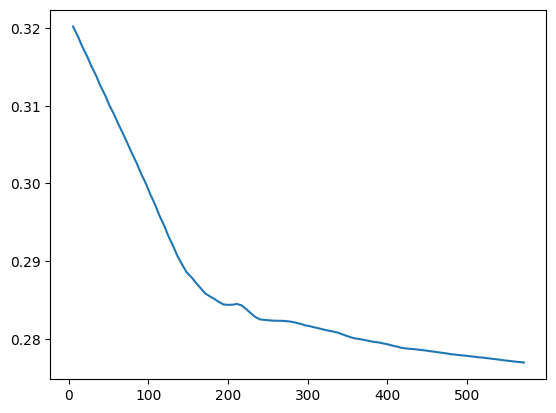

In [ ]:
AMORE_Optimization()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
inputs['test']['rxn']['prod']

In [ ]:
#conservation

In [ ]:
#
# inputs: conditions, background dict, test, compare_species, compare_species_r, species_list_names_r, reference_data, spec_factor,


In [ ]:
inputs['test']['rxn']['prod_coeff']

In [ ]:
inputs.keys()

In [ ]:
a = os.getcwd()

In [ ]:
a

'/content'